# Recommendation System In e-commerce Business

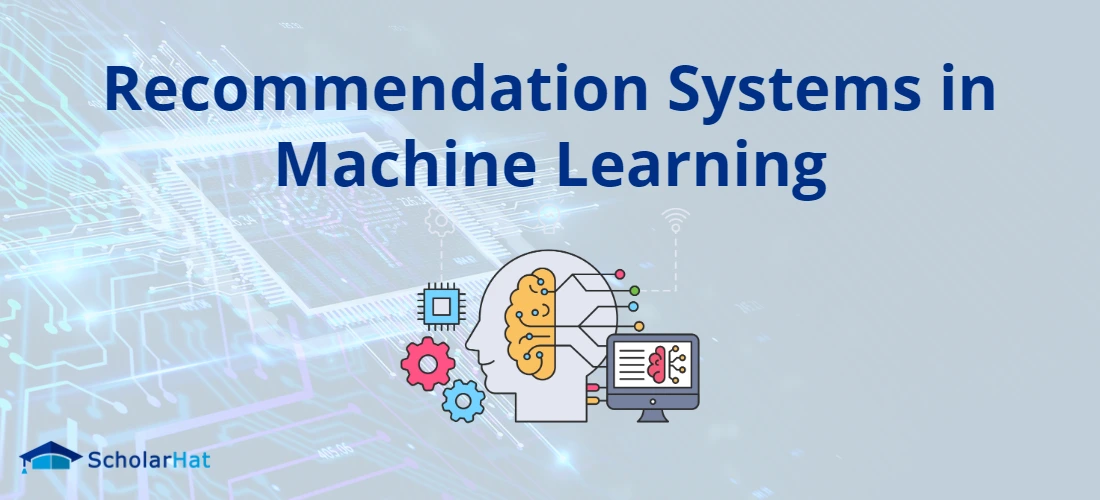

PC:https://www.scholarhat.com/

### Problem Statement


The e-commerce business is quite popular today. Here, we do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.



Suppose we are working in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.



With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.


We have to build a model that will improve the recommendations given to the users given their past reviews and ratings.


In order to do this, we planned to build a sentiment-based product recommendation system, which includes the following tasks.

- Data sourcing and sentiment analysis
- Building a recommendation system
- Improving the recommendations using the sentiment analysis model
- Deploying the end-to-end project with a user interface


Data sourcing and sentiment analysis
In this task, we have to analyse product reviews after some text preprocessing steps and build an ML model to get the sentiments corresponding to the users' reviews and ratings for multiple products.

This dataset consists of 30,000 reviews for more than 200 different products. The reviews and ratings are given by more than 20,000 users. Please refer to the following attribute description file to get the details about the columns of the Review Dataset.


The steps to be performed for the first task are given below.

- Exploratory data analysis

- Data cleaning

- Text preprocessing

- Feature extraction: In order to extract features from the text data, we may choose from any of the methods, including bag-of-words, TF-IDF vectorization or word embedding.

Training a text classification model: We need to build at least three ML models. We then need to analyse the performance of each of these models and choose the best model. At least three out of the following four models need to be built (Do not forget, if required, handle the class imbalance and perform hyperparameter tuning.).
1. Logistic regression
2. Random forest
3. XGBoost
4. Naive Bayes

Out of these four models, we need to select one classification model based on its performance.

Building a recommendation system
As we learnt earlier, we can use the following types of recommendation systems.



1. User-based recommendation system

2. Item-based recommendation system



Our task is to analyse the recommendation systems and select the one that is best suited in this case.



Once we get the best-suited recommendation system, the next task is to recommend 20 products that a user is most likely to purchase based on the ratings. we can use the 'reviews_username' (one of the columns in the dataset) to identify our user.



Improving the recommendations using the sentiment analysis model
Now, the next task is to link this recommendation system with the sentiment analysis model that was built earlier (recall that we had to select one ML model out of the four options). Once we recommend 20 products to a particular user using the recommendation engine, we need to filter out the 5 best products based on the sentiments of the 20 recommended product reviews.



In this way, we will get an ML model (for sentiments) and the best-suited recommendation system.

In [ ]:
#Importing dependencies/Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import pickle
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import pairwise_distances
import random
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
import xgboost as xgb
from sklearn.metrics import confusion_matrix, f1_score,roc_auc_score, roc_curve

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Reading project file
user_data=pd.read_csv("/content/drive/MyDrive/sample30.csv")
user_data.head(2)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive


In [5]:
#lets check out attribute/feature description provided seperately
user_data_attributes_desc=pd.read_csv("/content/drive/MyDrive/Data+Attribute+Description.csv"
                                      ,encoding='windows-1252')
user_data_attributes_desc

,Attribute,Attribute Description
0,id,Uniques identity number to identify each uniqu...
1,brand,Name of the brand of the product to which user...
2,categories,Category of the product like household essenti...
3,manufacturer,Name of the manufacturer of the product
4,name,Name of the product to which user has added re...
5,reviews_date,Date on which the review has been added by the...
6,reviews_didPurchase,Whether a particular user has purchased the pr...
7,reviews_doRecommend,Whether a particular user has recommended the ...
8,reviews_rating,Rating given by the user to a particular product
9,reviews_text,Review given by the user to a particular product


In [6]:
#Lets check out basic data checks like shape, data type etc.
user_data.shape

(30000, 15)

In [7]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [8]:
#Let us check duplicate values
user_data.duplicated().value_counts()

False    30000
dtype: int64

In [9]:
#Let us check Null values
for feature in user_data.columns:
    print('No. of NaN in  ', feature, '---------',user_data[feature].isnull().sum())

No. of NaN in   id --------- 0
No. of NaN in   brand --------- 0
No. of NaN in   categories --------- 0
No. of NaN in   manufacturer --------- 141
No. of NaN in   name --------- 0
No. of NaN in   reviews_date --------- 46
No. of NaN in   reviews_didPurchase --------- 14068
No. of NaN in   reviews_doRecommend --------- 2570
No. of NaN in   reviews_rating --------- 0
No. of NaN in   reviews_text --------- 0
No. of NaN in   reviews_title --------- 190
No. of NaN in   reviews_userCity --------- 28071
No. of NaN in   reviews_userProvince --------- 29830
No. of NaN in   reviews_username --------- 63
No. of NaN in   user_sentiment --------- 1


For our analysis features like `user_sentiment`, `reviews_username`, `reviews_title`,`reviews_rating`, `name` & `reviews_text` are relevant. Thus dropping rows wherever we have null values as such data is very small in number compared to overall data.

In [10]:
#Dropping rows with reviews_username & as null value
user_data=user_data[~user_data.reviews_username.isnull()]
print(user_data.shape)
user_data=user_data[~user_data.user_sentiment.isnull()]
print(user_data.shape)

(29937, 15)
(29936, 15)


In [11]:
#imputing whitespace in null values in `reviews_title` with space
user_data['reviews_title'].fillna(value=' ', inplace=True)

In [12]:
print(user_data.shape)

(29936, 15)


In [13]:
print(user_data.reviews_username.isnull().sum())
print(user_data.user_sentiment.isnull().sum())
print(user_data.reviews_title.isnull().sum())

0
0
0


In [14]:
#Let us check out unique enteries
for feature in user_data.columns:
    print('No. of unique values in  ', feature, '---------',user_data[feature].nunique(dropna = False))

No. of unique values in   id --------- 271
No. of unique values in   brand --------- 214
No. of unique values in   categories --------- 270
No. of unique values in   manufacturer --------- 228
No. of unique values in   name --------- 271
No. of unique values in   reviews_date --------- 6816
No. of unique values in   reviews_didPurchase --------- 3
No. of unique values in   reviews_doRecommend --------- 3
No. of unique values in   reviews_rating --------- 5
No. of unique values in   reviews_text --------- 27227
No. of unique values in   reviews_title --------- 18490
No. of unique values in   reviews_userCity --------- 968
No. of unique values in   reviews_userProvince --------- 41
No. of unique values in   reviews_username --------- 24914
No. of unique values in   user_sentiment --------- 2


Id and name have same no. of unique value thus they correspond to same item

In [15]:
#Sanity check for sentiments and user ratings
user_data[(user_data.user_sentiment == 'Positive') &
                      (user_data.reviews_rating < 3)] [['reviews_rating','user_sentiment','reviews_text']]

,reviews_rating,user_sentiment,reviews_text
9,1,Positive,Got as a surprise for my husband there is noth...
11,1,Positive,Purchased this thinking it would have some sor...
14,1,Positive,First time purchase of this type of product. M...
54,1,Positive,I used (and loved) this product for several ye...
56,1,Positive,I am so disappointed! I have used this product...
...,...,...,...
28869,2,Positive,This was the last step out of the three step p...
28870,2,Positive,"I have been a big LOral fan, using their produ..."
28871,2,Positive,Despite using this with the line's hair mask a...
28872,2,Positive,I tried out this whole set.i wanted it to work...


In [16]:
#Sanity check for sentiments and user ratings
user_data[(user_data.user_sentiment == 'Negative') &
                      (user_data.reviews_rating >= 4)] [['reviews_rating','user_sentiment','reviews_text']]


,reviews_rating,user_sentiment,reviews_text
92,4,Negative,It hydrates my skin. It is not too thick and h...
96,4,Negative,In only a week I can see the difference in my ...
100,4,Negative,This product has made my skin smoother and sup...
106,4,Negative,I like to use this cream on my neck and collar...
117,4,Negative,I finally found a moisturizing product that wi...
...,...,...,...
29818,5,Negative,I received a complimentary sample of this prod...
29855,5,Negative,This has prolonged the color in my hair! Not o...
29858,5,Negative,This conditioner makes my hair very soft witho...
29862,5,Negative,This conditioner has become a staple in my hai...


It is seen that in lot of products review rating is less, however sentiment is positive similarily sentiment is negative however rating is hight. Regarding this it was seen in majority of items as per review sentiment is positive as customer want to buy product but due to issue regarding non availability, specific color not avilable users are giving bad rating. Therfore, lets not manipulate data provided and processing of data is being done as per original data.

# 1. Binary Classification System for Sentiment Analysis

Relevance of various features in Data is as under:

`id`: We already have name column,  this column is not relevant.

`brand`:only name of product is important thererfore  this column is not relevant.

`categories`: only name of product is important thererfore  this column is not relevant.

`manufacturer`:only name of product is important thererfore  this column is not relevant.

`reviews_date`:This column would not aid in making recommendations, thererfore  this column is not relevant.

`reviews_didPurchase`:Non-buyers can also provide product reviews on our website and we use those reviews for our recommendation system. Hence we can not filter customers based on this column, thererfore this column is not relevant.

`reviews_doRecommend`:This column is not important as we would do not give importance to user-given recommendations, thererfore  this column is not relevant..

`reviews_userProvince`:Geographic information doesn't play role here, thererfore  this column is not relevant.

`reviews_userCity`:Geographic information doesn't play role here, thererfore  this column is not relevant.

For sentiment analysis only `reviews_text`, `reviews_title ` and `user_sentiment` part of data is relevant so keeping only relevant part of data

In [17]:
user_data_sa=user_data[['user_sentiment','reviews_text','reviews_title']]
user_data_sa.head()

,user_sentiment,reviews_text,reviews_title
0,Positive,i love this album. it's very good. more to the...,Just Awesome
1,Positive,Good flavor. This review was collected as part...,Good
2,Positive,Good flavor.,Good
3,Negative,I read through the reviews on here before look...,Disappointed
4,Negative,My husband bought this gel for us. The gel cau...,Irritation


In [18]:
#Lets concat data in 'reviews_text','reviews_title' together to get best results
user_data_sa['final_review']=  user_data_sa['reviews_text'] #+ " " + user_data_sa['reviews_title']

After adding reviews title feature into data drop in performance of model  was seen may be due to repetition of similar tokens, therefore same is not considered.

In [19]:
# dropping 'reviews_text','reviews_title' column
user_data_sa.drop(['reviews_title','reviews_text'], axis=1, inplace=True)

In [20]:
user_data_sa.head(2)

,user_sentiment,final_review
0,Positive,i love this album. it's very good. more to the...
1,Positive,Good flavor. This review was collected as part...


In [21]:
user_data_sa['final_review']=user_data_sa['final_review'].astype('str')

In [22]:
user_data_sa.duplicated().sum()

2709

In [23]:
user_data_sa.drop_duplicates(inplace=True)

In [24]:
user_data_sa.duplicated().sum()

0

In [25]:
user_data_sa.shape

(27227, 2)

In [26]:
#% of negative sentiments in Overall data
print('% of negative sentiments in overall data = ',
      round(user_data_sa['user_sentiment'].value_counts()[-1]/user_data_sa['user_sentiment'].count()*100,2)," %")

% of negative sentiments in overall data =  11.22  %


There is class Imbalance in data, we have to check this class imbalance in data appropriately.

### Data Cleaning

In [27]:
#loading nltk packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [28]:
# Lets pre process our reviews data

#Lets call spell corrector to check the spelling in order to reduce size of feature matrix
#Lets import spellcheck.
import sys
sys.path.append('/content/drive/MyDrive/')

# importing spell_corrector.py and using big.txt as seed document
import spell_corrector as sc
import string

## initialise the inbuilt Stemmer and the Lemmatizer
stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

#defining list of stop words and other words
stop_words=stopwords.words("english") + ['hi','im'] #extra words to be removed

#removing all the stop words which can change negative sentiment
stop_words=[word for word in stop_words if word not in ['no','not','nor','never','very','more','most']]

def get_clean_data(document, stem=True):
    '''changes document to lower case, removes stopwords excludingn few negations, extra spaces, punctuations etc.,
    spell check and lemmatizes/stems the remainder of the sentence'''

    # change sentence to lower case
    document = document.lower()

    #removing special characters/punctuations and numbers from text
    document= re.sub('[^A-Za-z0-9 ]+',' ', document)

    #remove line breaks
    document= re.sub('\n', '', document)

    #remove extra space
    document = re.sub('\s+', ' ', document)

    # tokenize into words
    words = word_tokenize(document)

    #remove words containing numbers
    words = [word for word in words if word.isalpha()]

    # remove stopwords
    words = [word for word in words if word not in stop_words]

    #Spell check
    #correcting all the words which are one edit away
    #not used as spell checker is not effective and instead reducing performance
    #words = [sc.rectify(word) for word in words]

    # Stemming/Lemmatizing
    #not used as Stemming/Lemmatizing is not effective and instead reducing performance
    #if stem:
     #   words = [stemmer.stem(word) for word in words]
    #else:
     #   words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]

    # join words to make sentence
    document = " ".join(words)

    return document

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [29]:
%%time
user_data_sa['final_review_clean']=user_data_sa['final_review'].apply(get_clean_data)

CPU times: user 10.5 s, sys: 0 ns, total: 10.5 s
Wall time: 11.4 s


In [30]:
#user_data_sa.to_csv('cleaned_user_data_sa.csv')

In [31]:
#user_data_sa=pd.read_csv('/content/cleaned_user_data_sa.csv')

In [32]:
user_data_sa.head()

,user_sentiment,final_review,final_review_clean
0,Positive,i love this album. it's very good. more to the...,love album very good more hip hop side current...
1,Positive,Good flavor. This review was collected as part...,good flavor review collected part promotion
2,Positive,Good flavor.,good flavor
3,Negative,I read through the reviews on here before look...,read reviews looking buying one couples lubric...
4,Negative,My husband bought this gel for us. The gel cau...,husband bought gel us gel caused irritation fe...


In [33]:
user_data_sa.shape

(27227, 3)

In [34]:
user_data_sa

,user_sentiment,final_review,final_review_clean
0,Positive,i love this album. it's very good. more to the...,love album very good more hip hop side current...
1,Positive,Good flavor. This review was collected as part...,good flavor review collected part promotion
2,Positive,Good flavor.,good flavor
3,Negative,I read through the reviews on here before look...,read reviews looking buying one couples lubric...
4,Negative,My husband bought this gel for us. The gel cau...,husband bought gel us gel caused irritation fe...
...,...,...,...
29995,Positive,I got this conditioner with Influenster to try...,got conditioner influenster try loving far oil...
29996,Positive,"I love it , I received this for review purpose...",love received review purposes influenster leav...
29997,Positive,First of all I love the smell of this product....,first love smell product wash hair smooth easy...
29998,Positive,I received this through Influenster and will n...,received influenster never go back anything el...


In [35]:
#lets check dupliacte values
user_data_sa.duplicated().sum()

0

In [36]:
#checking null values
user_data_sa.isnull().sum().sum()

0

In [37]:
#lets check out length of review
user_data_sa['length'] = user_data_sa['final_review_clean'].apply(len)
user_data_sa.head()

,user_sentiment,final_review,final_review_clean,length
0,Positive,i love this album. it's very good. more to the...,love album very good more hip hop side current...,113
1,Positive,Good flavor. This review was collected as part...,good flavor review collected part promotion,43
2,Positive,Good flavor.,good flavor,11
3,Negative,I read through the reviews on here before look...,read reviews looking buying one couples lubric...,417
4,Negative,My husband bought this gel for us. The gel cau...,husband bought gel us gel caused irritation fe...,80


In [38]:
# function to find unique words in the entire 'final_review_clean' column

def get_unique_words(df_col):
    all_word = []
    for i in range(df_col.shape[0]):
        all_word = all_word + df_col.iloc[i]
    print('no. unique of words: ', len(set(all_word)))

In [39]:
user_data_sa['final_review_clean_token'] = user_data_sa['final_review_clean'].apply(lambda i:word_tokenize(i))

In [40]:
get_unique_words(user_data_sa['final_review_clean_token'])

no. unique of words:  16951


### Exploratory Data Analysis

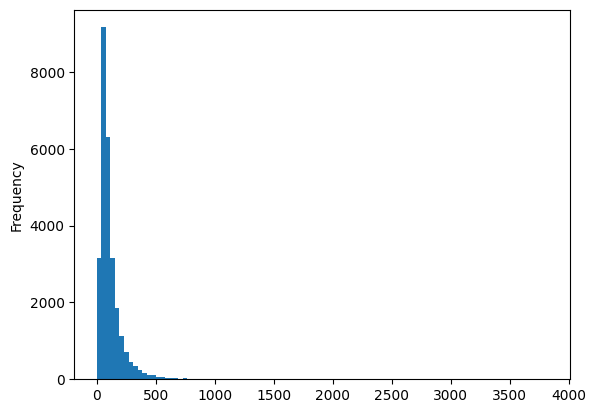

In [41]:
#Lets check distribution of length of review
user_data_sa['length'].plot(bins=100, kind='hist')
plt.show()

In [42]:
user_data_sa['length'].describe()

count    27227.000000
mean       113.571565
std        114.656153
min          0.000000
25%         53.000000
50%         82.000000
75%        133.000000
max       3824.000000
Name: length, dtype: float64

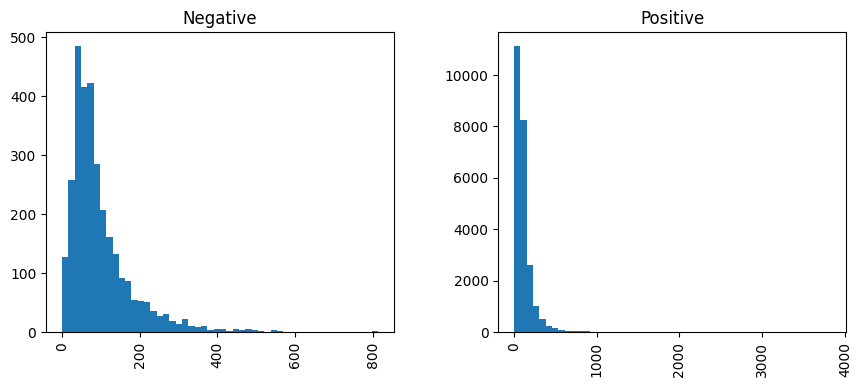

In [43]:
#Now let's focus on the idea of trying to see if review length is a distinguishing feature between positive and negative review:
user_data_sa.hist(column='length', by='user_sentiment', bins=50,figsize=(10,4))
plt.show()

As seen above Negative reviews are generally longer compared to positive reviews

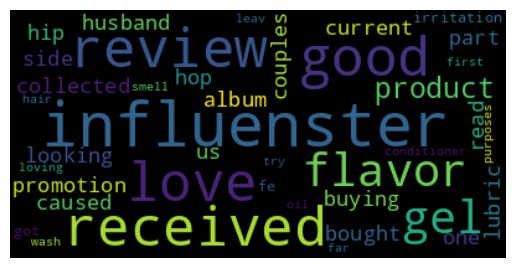

In [44]:
# #Lets check out word cloud
from PIL import Image
from wordcloud import WordCloud

text=user_data_sa["final_review_clean"]
wordcloud = WordCloud(max_font_size=50,
                       max_words=40,
                       background_color="black").generate(str(text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [45]:
#Lets checkout Unigrams and Bigrams

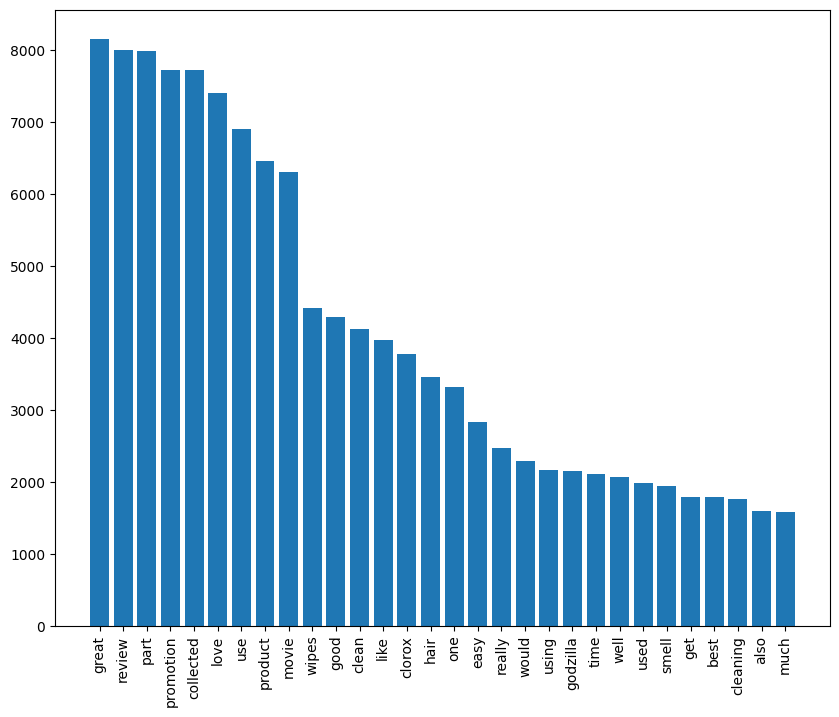

In [46]:
# #Writing code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean).
from sklearn.feature_extraction.text import CountVectorizer

stoplist = stopwords.words('english')
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(0,1))
# # matrix of ngrams
ngrams = c_vec.fit_transform(user_data_sa['final_review_clean'])
# # count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# # list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
             ).rename(columns={0: 'frequency', 1:'unigram'})
plt.figure(figsize=(10,8))
plt.bar(df_ngram.unigram[:30],df_ngram.frequency[:30])
plt.xticks(rotation=90)
plt.show()

In [47]:
#Printing the top 10 words in the unigram frequency
df_ngram.unigram[:10]

0        great
1       review
2         part
3    promotion
4    collected
5         love
6          use
7      product
8        movie
9        wipes
Name: unigram, dtype: object

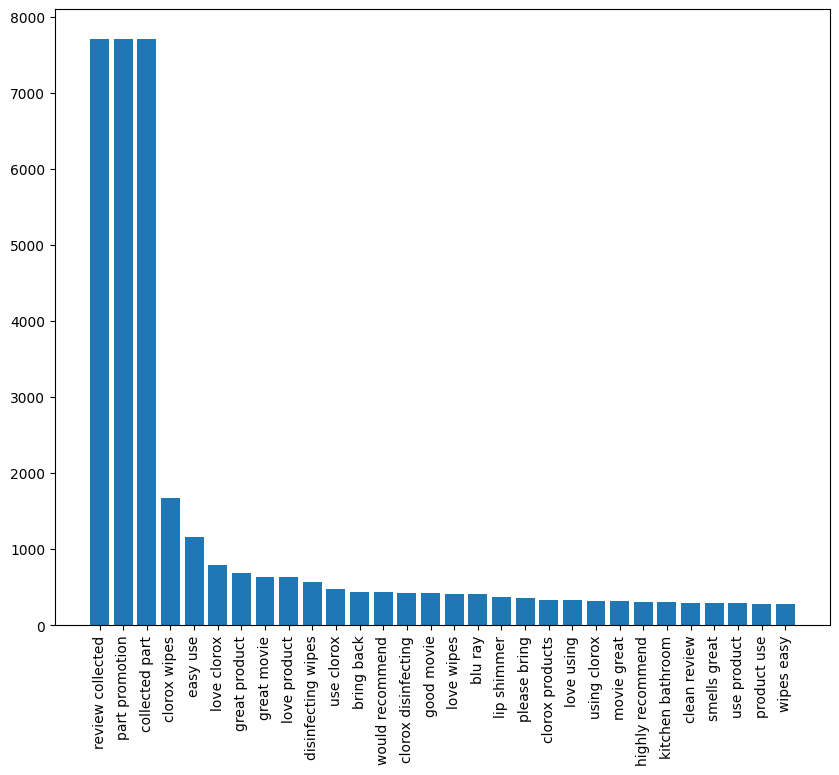

In [48]:
# #Bigrams
# #Writing code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean).
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,2))
# # matrix of ngrams
ngrams = c_vec.fit_transform(user_data_sa['final_review_clean'])
# # count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# # list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
             ).rename(columns={0: 'frequency', 1:'bigram'})
plt.figure(figsize=(10,8))
plt.bar(df_ngram.bigram[:30],df_ngram.frequency[:30])
plt.xticks(rotation=90)
plt.show()

In [49]:
#Printing the top 10 words in the bigram frequency
df_ngram.bigram[:10]

0      review collected
1        part promotion
2        collected part
3          clorox wipes
4              easy use
5           love clorox
6         great product
7           great movie
8          love product
9    disinfecting wipes
Name: bigram, dtype: object

### Feature extraction

Lets create features using TfIdf Vectorizer

In [50]:
# creating the Bag of words Model
max_features=user_data_sa['length'].max()
max_features

3824

In [51]:
#Lets check out longest review
user_data_sa[user_data_sa['length'] == max_features]['final_review'].iloc[0]

'First, a disclaimer of sorts . Im a long-term, died-in-the-wool Hoover evangelist. No, I dont work for Hoover, but Ive used Hoovers religiously for 30 years. Ive tried switching off to other top-of-the-line brands, but always returned to Hoover for their unsurpassed cleaning power and reliability.That does not, however, mean they were perfect. The Hoover WindTunnel U6439 bagged upright that Ive had for the last several years would suck up a Buick. Unfortunately, it also rivaled a Buick in the weight category. Although its supposedly a self-propelled model, I felt like I had to go into training in order to vacuum my house. It became something I would put off because I wasnt sure I had the strength to wrestle this bulky beast all over my house. The WindTunnel controls which allow you to change the brush height from carpet to floor were manual, hard-to-move levers on the brush housing which required you to shut the machine off in order to properly manipulate them. The HEPA filter on my o

In [52]:
user_data_sa[user_data_sa['length'] == max_features]['final_review_clean'].iloc[0]

'first disclaimer sorts long term died wool hoover evangelist no dont work hoover ive used hoovers religiously years ive tried switching top line brands always returned hoover unsurpassed cleaning power reliability not however mean perfect hoover windtunnel bagged upright ive last several years would suck buick unfortunately also rivaled buick weight category although supposedly self propelled model felt like go training order vacuum house became something would put wasnt sure strength wrestle bulky beast house windtunnel controls allow change brush height carpet floor manual hard move levers brush housing required shut machine order properly manipulate hepa filter old windtunnel seemed work first months manner airborne particles would fly around vacuumed even cleaned replaced filters lastly noise previous windtunnel something akin jet taking saw tv commercial hoover platinum series machines definitely intrigued loved idea getting two separate vacuums together one price brilliant marke

In [53]:
#Collecting all the training data in single list
corpus=user_data_sa['final_review_clean'].to_list()

In [54]:
corpus[0:10]

['love album very good more hip hop side current pop sound hype listen everyday gym give rating way metaphors crazy',
 'good flavor review collected part promotion',
 'good flavor',
 'read reviews looking buying one couples lubricants ultimately disappointed even live reviews read starters neither boyfriend nor could notice sort enhanced captivating sensation notice however messy consistency reminiscent more liquid vaseline difficult clean not pleasant especially since lacked captivating sensation expecting disappointed paid much lube use could use normal personal lubricant less money less mess',
 'husband bought gel us gel caused irritation felt like burning skin recommend gel',
 'boyfriend bought spice things bedroom highly disappointed product bought one absolutely love ky mine thought would similar affect absolutely nothing not buy',
 'bought earlier today excited check based product description expecting something like regular ky fans expected more left little disappointed',
 'bou

In [55]:
#Lets create features using Tfidf Vectorizer
tfidf=TfidfVectorizer(max_features=max_features,ngram_range=(1,2))
X=tfidf.fit_transform(corpus).toarray()

In [56]:
y=user_data_sa.iloc[:,0].values
y

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [57]:
#Train_test_split
#Dividing data into train test, validation and test data
X_train,X_rem,y_train,y_rem=train_test_split(X,y,shuffle=True, train_size=0.7, stratify=y, random_state=62)

In [58]:
print('Training X, y size is ', X_train.shape, y_train.shape)
print('Remaning X & Y size is ', X_rem.shape,y_rem.shape)

Training X, y size is  (19058, 3824) (19058,)
Remaning X & Y size is  (8169, 3824) (8169,)


In [59]:
#Dividing remaining data into test and validation data
X_val,X_test,y_val,y_test=train_test_split(X_rem,y_rem,shuffle=True, train_size=0.5, stratify=y_rem, random_state=62)

In [60]:
print('Validiation X, y size is ', X_val.shape, y_val.shape)
print('Test X & Y size is ', X_test.shape,y_test.shape)

Validiation X, y size is  (4084, 3824) (4084,)
Test X & Y size is  (4085, 3824) (4085,)


In [61]:
#Lets check class imbalance
print('No. of + & - ve sentiment in Train Data is','\n', pd.DataFrame(y_train).value_counts())
print('************************************************')
print('No. of + & - ve sentiment in Test Data is','\n',pd.DataFrame(y_test).value_counts())
print('************************************************')
print('No. of + & - ve sentiment in Validation Data is','\n',pd.DataFrame(y_val).value_counts())
print('************************************************')

No. of + & - ve sentiment in Train Data is 
 Positive    16920
Negative     2138
dtype: int64
************************************************
No. of + & - ve sentiment in Test Data is 
 Positive    3627
Negative     458
dtype: int64
************************************************
No. of + & - ve sentiment in Validation Data is 
 Positive    3626
Negative     458
dtype: int64
************************************************


In [62]:
#% of negative sentiments in train data
print('% of negative sentiments in train data = ',
      round(pd.DataFrame(y_train).value_counts()[-1]/len(y_train)*100,2)," %")

#% of negative sentiments in test data
print('% of negative sentiments in test data = ',
      round(pd.DataFrame(y_test).value_counts()[-1]/len(y_test)*100,2)," %")

#% of negative sentiments in validation data
print('% of negative sentiments in validation data = ',
      round(pd.DataFrame(y_val).value_counts()[-1]/len(y_val)*100,2)," %")

% of negative sentiments in train data =  11.22  %
% of negative sentiments in test data =  11.21  %
% of negative sentiments in validation data =  11.21  %


Roughly 11.3% of data is of Negative sentiments in all kind of data. So data is equally distributed but there is class imbalance

In [63]:
#Before modeling lets change labels of target variable as 0 & 1 and same are required for XG Boost
def label_change(data):
  func=lambda x: 1 if x =='Positive' else 0
  data = np.array(list(map(func, data)))
  return data

In [64]:
y_train_bin=label_change(y_train)
y_test_bin=label_change(y_test)
y_val_bin=label_change(y_val)
print(y_train_bin.shape)
print(y_train.shape)
print(y_test_bin.shape)
print(y_test.shape)
print(y_val_bin.shape)
print(y_val.shape)

(19058,)
(19058,)
(4085,)
(4085,)
(4084,)
(4084,)


### Model Buidling

For Model lets built a custom function which will predict on valiadtion data and calculate metrics associated with model in one go

In [65]:
#To Evaluate model let us define metrices
def plot_metrics(classifier,X,y):
  '''
  To plot auc_curve and F1 score vs threshold curve and to print optimum threshold value
  '''
  # plotting the ROC curve
  fpr, tpr, thresholds = roc_curve(y,classifier.predict_proba(X)[:,1])
  plt.plot(fpr, tpr)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.show()

  # thresholding to tune the threshold value
  f1_score_list = []
  for i in thresholds:
      y_comp = classifier.predict_proba(X)[:,1] > i
      f1_score_list.append(f1_score(y, y_comp, average='macro'))

  # plotting the F1-score for different threshold values
  plt.plot(thresholds,f1_score_list)
  plt.xlabel('thresholds')
  plt.ylabel('f1_score')
  plt.show()

  # finding the optimum threshold value for maximum F-1 score
  global optimum_threshold
  optimum_threshold = thresholds[f1_score_list.index(max(f1_score_list))]
  print('optimum_threshold:', optimum_threshold)


def Metrics(X,y,classifier, model):
  '''
  Function to calculate various metrics based on optimum threshold
  '''
  metrics={}
  # class prediction based on the obtained optimum_threshold value
  y_pred = classifier.predict_proba(X)[:,1] > optimum_threshold
  cm=confusion_matrix(y,y_pred)
  TP=cm[1,1]
  TN=cm[0,0]
  FP=cm[0,1]
  FN=cm[1,0]
  acc=100*round((TP+TN)/(TP+TN+FP+FN),4)
  sen=100*round((TP)/(TP+FN),4)
  spec=100*round((TN)/(TN+FP),4)
  prec=100*round((TP)/(TP+FP),4)
  reca=100*round((TP)/(TP+FN),4)
  TPR=100*round((TP)/(TP+FN),4)
  FPR=100*round((FP)/(TN+FP),4)
  F1_score=round((2*prec*reca/(prec+reca))/100,4)
  roc_score=100*round(roc_auc_score(y,y_pred),4)
  return {'Model':model,'Accuracy':acc,'Sensitivity':sen,'Specificity':spec,'Precision':prec,'Recall':reca,\
            'True Positive rate':TPR,'False Positive rate':FPR,'F1 Score':F1_score,'ROC score':roc_score}

In [66]:
#Lets create function to generate selected model
def model_generator(model,X,y):
  '''
  1.Function instantiate and fit model
  2.Global variables are generated so the model can be called outside function also
  '''
  if model == 'Logistics Regression':
    global lr
    lr=LogisticRegression()
    print("Fitting Logistics Regression model ........")
    print('\n')
    lr.fit(X,y)
    print("****Model Generated****")
    print('\n')
  elif model =='Naive Bayes':
    global mnb
    mnb=MultinomialNB()# GaussianNB,MultinomialNB,BernoulliNB
    print("Fitting Naive Bayes model ........")
    print('\n')
    mnb.fit(X,y)
    print("****Model Generated****")
    print('\n')
  elif model== 'Random Forest':
    global rmf
    rmf = RandomForestClassifier()
    print("Fitting Random Forest model ........")
    print('\n')
    rmf.fit(X,y)
    print("****Model Generated****")
    print('\n')
  elif model =='XG Boost':
    global xgboost
    xgboost=xgb.XGBClassifier()
    print("Fitting XG Boost model ........")
    print('\n')
    xgboost.fit(X,y)
    print("****Model Generated****")
    print('\n')

#function to create dataframe with all model artifacts/metrics
def get_model_metrics(model,X,y,classifier,X_validation, y_validation):
  '''
  Function to create dataframe with all the metrics in order to compares validation and train results
  '''

  global metric_ml_models_df
  metric_ml_models_df= pd.DataFrame(columns=['Model','Accuracy','Sensitivity','Specificity','Precision','Recall',
                                 'True Positive rate','False Positive rate','F1 Score','ROC score'])
  metric_ml_models_df=metric_ml_models_df.append(Metrics(X_validation, y_validation, classifier, model + " Validation"),ignore_index=True)
  metric_ml_models_df=metric_ml_models_df.append(Metrics(X,y, classifier,model+ " train"),ignore_index=True)
  return metric_ml_models_df

1. Logistics Regression

In [67]:
#calling model generator function to generate Logistics regression model
%%time
model_generator('Logistics Regression',X_train, y_train_bin)

Fitting Logistics Regression model ........


****Model Generated****


CPU times: user 12.7 s, sys: 995 ms, total: 13.7 s
Wall time: 9.63 s


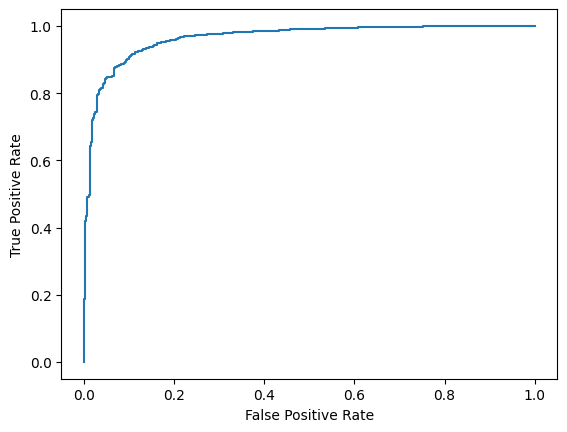

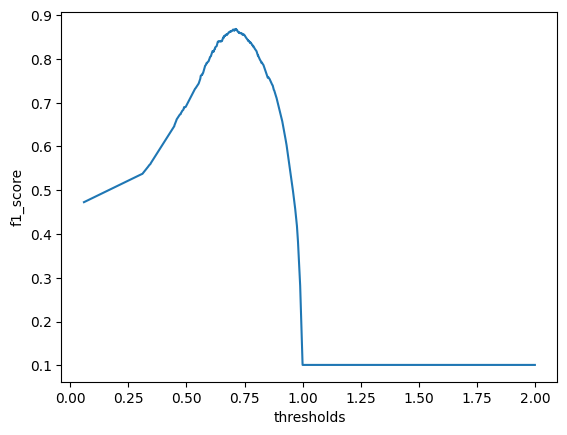

optimum_threshold: 0.7126003866620078


In [68]:
#calling plot_metrics function to plot ROC_AUC curve and distribution of f1 score with threshold
plot_metrics(lr,X_val, y_val_bin)

In [69]:
# getting all the model metrics into a dataframe
lr_df=get_model_metrics('Logistics Regression',X_train, y_train_bin, lr, X_val, y_val_bin)
lr_df

,Model,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
0,Logistics Regression Validation,94.69,96.83,77.73,97.18,96.83,96.83,22.27,0.9700,87.28
1,Logistics Regression train,96.21,97.36,87.14,98.36,97.36,97.36,12.86,0.9786,92.25


2. Naive Bayes Model

In [70]:
%%time
model_generator('Naive Bayes',X_train, y_train_bin)

Fitting Naive Bayes model ........


****Model Generated****


CPU times: user 435 ms, sys: 7.85 ms, total: 443 ms
Wall time: 285 ms


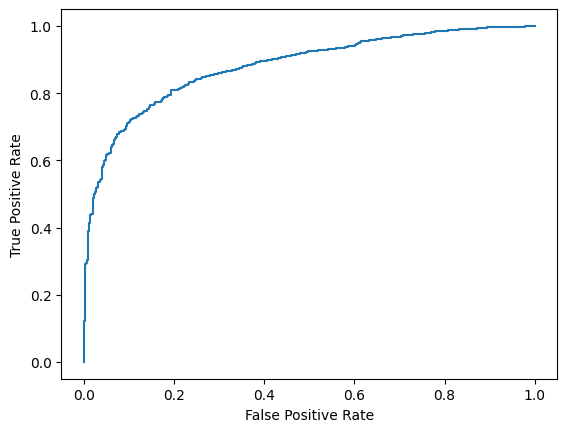

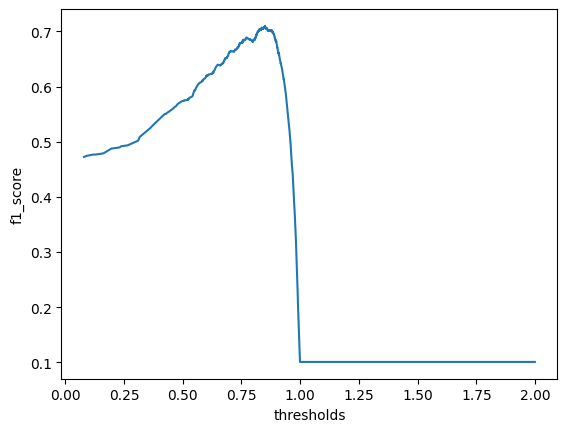

optimum_threshold: 0.8502361504649623


In [71]:
plot_metrics(mnb,X_val, y_val_bin)

In [72]:
nb_df=get_model_metrics('Naive Bayes',X_train, y_train_bin, mnb, X_val, y_val_bin)
nb_df

,Model,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
0,Naive Bayes Validation,86.24,89.38,61.35,94.82,89.38,89.38,38.65,0.9202,75.37
1,Naive Bayes train,88.38,90.92,68.29,95.78,90.92,90.92,31.71,0.9329,79.60


3. Random Forest Classifier

In [73]:
%%time
model_generator('Random Forest',X_train, y_train_bin)

Fitting Random Forest model ........


****Model Generated****


CPU times: user 1min 3s, sys: 219 ms, total: 1min 4s
Wall time: 1min 12s


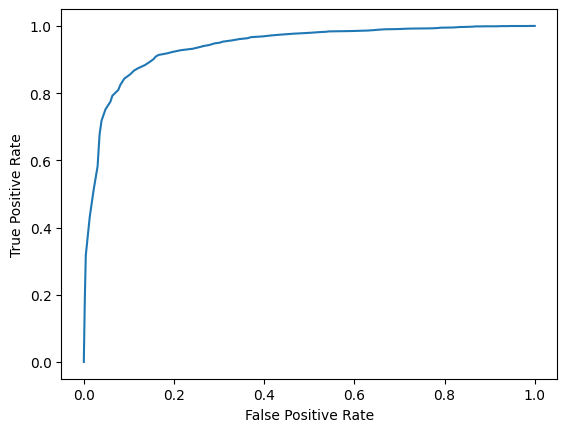

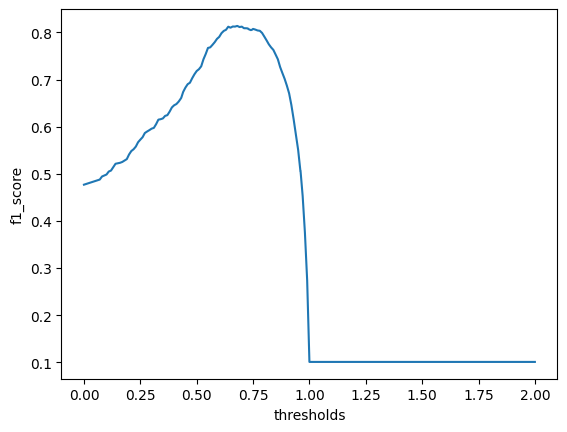

optimum_threshold: 0.68


In [74]:
plot_metrics(rmf, X_val, y_val_bin)

In [75]:
rfm_df=get_model_metrics('Random Forest', X_train, y_train_bin, rmf, X_val, y_val_bin)
rfm_df

,Model,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
0,Random Forest Validation,92.38,95.31,69.21,96.08,95.31,95.31,30.79,0.9569,82.26
1,Random Forest train,99.94,99.93,100.00,100.00,99.93,99.93,0.00,0.9996,99.97


4. XG Boost Classifier

In [76]:
%%time
model_generator('XG Boost', X_train, y_train_bin)

Fitting XG Boost model ........


****Model Generated****


CPU times: user 8min 7s, sys: 2.03 s, total: 8min 9s
Wall time: 6min 19s


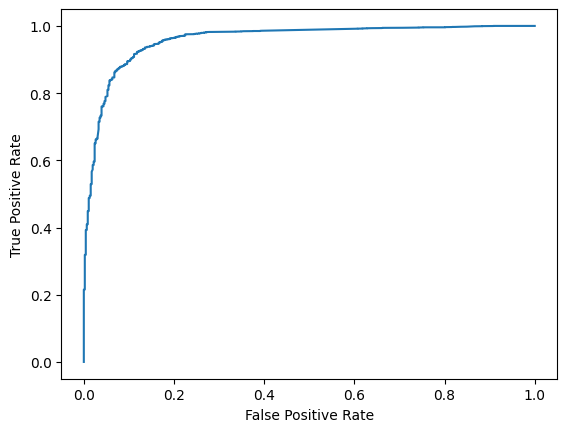

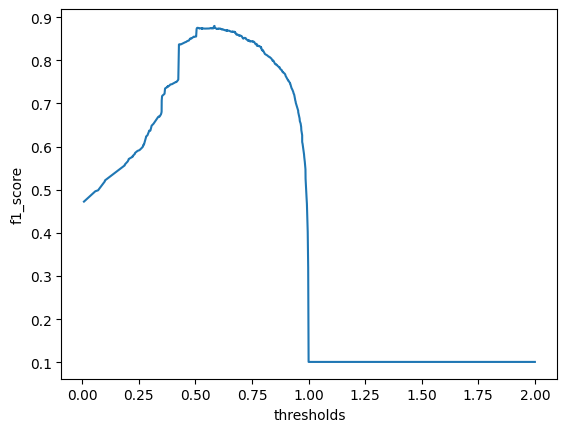

optimum_threshold: 0.58416235


In [77]:
plot_metrics(xgboost, X_val, y_val_bin)

In [78]:
xgb_df=get_model_metrics('XG Boost',X_train, y_train_bin, xgboost, X_val, y_val_bin)
xgb_df

,Model,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
0,XG Boost Validation,95.27,97.52,77.51,97.17,97.52,97.52,22.49,0.9734,87.51
1,XG Boost train,97.23,98.11,90.32,98.77,98.11,98.11,9.68,0.9844,94.21


In [79]:
final_get_model_metrics=pd.concat([lr_df,nb_df,rfm_df,xgb_df])
final_get_model_metrics.set_index("Model", inplace=True)

In [80]:
#Lets remove training results to compare validation results only
validation_metrics=final_get_model_metrics.loc[['Logistics Regression Validation','Naive Bayes Validation',
                                                   'Random Forest Validation','XG Boost Validation']]
validation_metrics.style.highlight_max(color = 'lightgreen', axis = 0)

,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
Model,,,,,,,,,
Logistics Regression Validation,94.690000,96.830000,77.730000,97.180000,96.830000,96.830000,22.270000,0.970000,87.280000
Naive Bayes Validation,86.240000,89.380000,61.350000,94.820000,89.380000,89.380000,38.650000,0.920200,75.370000
Random Forest Validation,92.380000,95.310000,69.210000,96.080000,95.310000,95.310000,30.790000,0.956900,82.260000
XG Boost Validation,95.270000,97.520000,77.510000,97.170000,97.520000,97.520000,22.490000,0.973400,87.510000


- There is no overfitting or underfitting in all the models
- As seen above best performing models are XG Boost & Logistics Regression Model with almost similar results with XG Boost slightly better in terms of AUC score and F1 score for validation data .
- Naive Bayes performance in not good in terms of ROC AUC value.
- As seen above specificity is very less i.e. 77.73% even for best performing model i.e. Logistics Regression. Reason for same may be high class imbalance in the Data.

## Solving Class Imbalance

As in instant case there is high class imbalance we will use SMOTE in order to take care of class iMbalance

In [81]:
pip install -U imbalanced-learn

In [82]:
#perform oversampling using smote in order to take care of class Imbalance
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_smo, y_train_smo = oversample.fit_resample(X_train, y_train)

In [83]:
X_train_smo.shape, y_train_smo.shape

((33840, 3824), (33840,))

In [84]:
pd.DataFrame(y_train_smo).value_counts()

Negative    16920
Positive    16920
dtype: int64

In [85]:
#% of negative sentiments in train data
print('% of negative sentiments in SMOTE train data = ',
      round(pd.DataFrame(y_train_smo).value_counts()[-1]/len(y_train_smo)*100,2)," %")

% of negative sentiments in SMOTE train data =  50.0  %


In [86]:
y_train_smo_mod=label_change(y_train_smo)
print(y_train_smo_mod.shape)
print(y_train.shape)

(33840,)
(19058,)


In [87]:
y_train_smo_mod

array([1, 0, 1, ..., 0, 0, 0])

So now there is no class imbalance.

#### Models after Class Imbalance

1. Logistics Regression

In [88]:
%%time
model_generator('Logistics Regression',X_train_smo, y_train_smo_mod)

Fitting Logistics Regression model ........


****Model Generated****


CPU times: user 21.2 s, sys: 1.94 s, total: 23.1 s
Wall time: 22.1 s


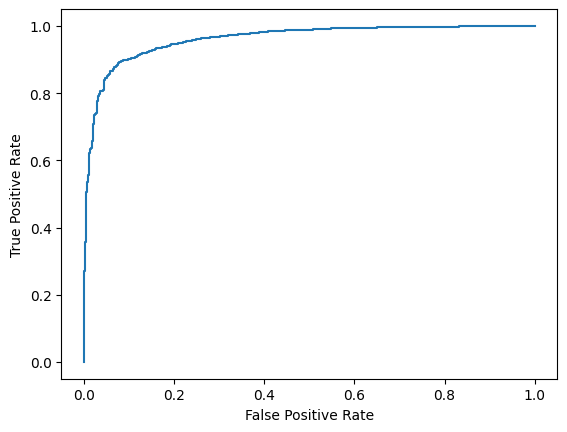

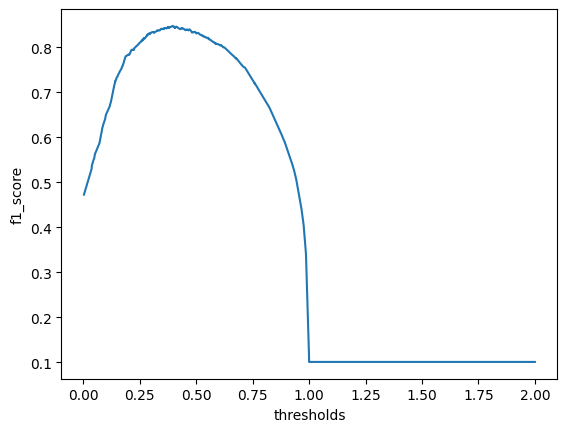

optimum_threshold: 0.39744467065389416


In [89]:
plot_metrics(lr, X_val, y_val_bin)

In [90]:
lr_df_smo=get_model_metrics('Logistics Regression',X_train_smo, y_train_smo_mod,lr, X_val, y_val_bin)
lr_df_smo

,Model,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
0,Logistics Regression Validation,93.85,96.39,73.80,96.68,96.39,96.39,26.20,0.9653,85.09
1,Logistics Regression train,96.86,97.48,96.25,96.29,97.48,97.48,3.75,0.9688,96.86


2. Naive Bayes

In [91]:
%%time
model_generator('Naive Bayes',X_train_smo, y_train_smo_mod)

Fitting Naive Bayes model ........


****Model Generated****


CPU times: user 702 ms, sys: 145 ms, total: 847 ms
Wall time: 976 ms


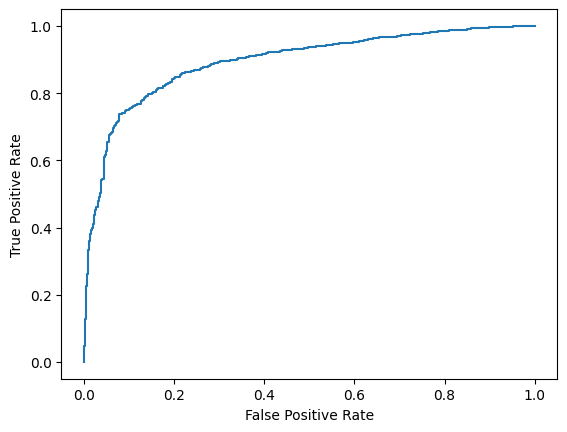

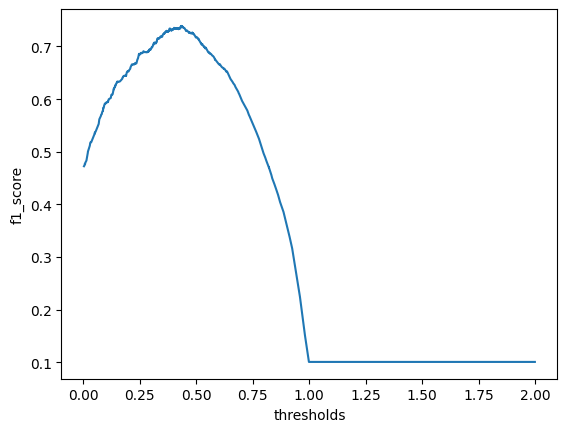

optimum_threshold: 0.4342701779320055


In [92]:
plot_metrics(mnb, X_val, y_val_bin)

In [93]:
nb_df_smo=get_model_metrics('Naive Bayes',X_train_smo, y_train_smo_mod, mnb, X_val, y_val_bin)
nb_df_smo

,Model,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
0,Naive Bayes Validation,87.29,89.49,69.87,95.92,89.49,89.49,30.13,0.9259,79.68
1,Naive Bayes train,78.58,90.88,66.29,72.94,90.88,90.88,33.71,0.8093,78.58


3. Random Forest

In [94]:
%%time
model_generator('Random Forest',X_train_smo, y_train_smo_mod)

Fitting Random Forest model ........


****Model Generated****


CPU times: user 2min 21s, sys: 374 ms, total: 2min 22s
Wall time: 2min 24s


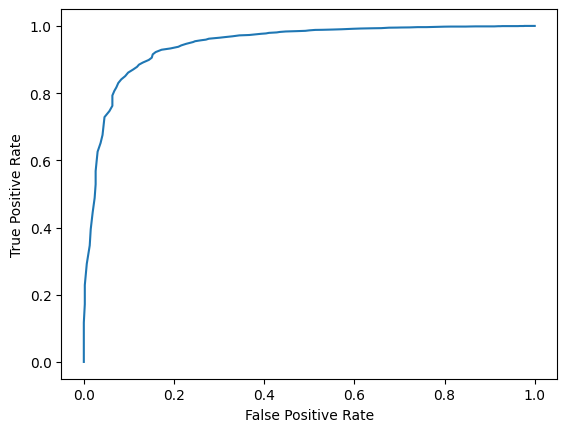

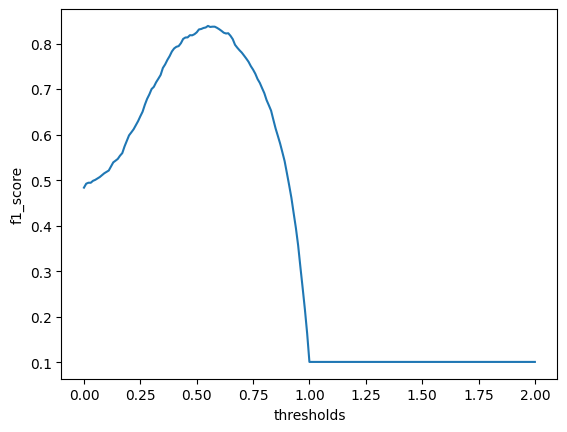

optimum_threshold: 0.55


In [95]:
plot_metrics(rmf, X_val, y_val_bin)

In [96]:
rfm_df_smo=get_model_metrics('Random Forest',X_train_smo, y_train_smo_mod, rmf, X_val, y_val_bin)
rfm_df_smo

,Model,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
0,Random Forest Validation,93.51,96.19,72.27,96.49,96.19,96.19,27.73,0.9634,84.23
1,Random Forest train,100.00,99.99,100.00,100.00,99.99,99.99,0.00,0.9999,100.00


Model is overfitting

4. XG Boost

In [97]:
%%time
model_generator('XG Boost',X_train_smo, y_train_smo_mod)

Fitting XG Boost model ........


****Model Generated****


CPU times: user 14min 21s, sys: 3.1 s, total: 14min 25s
Wall time: 8min 27s


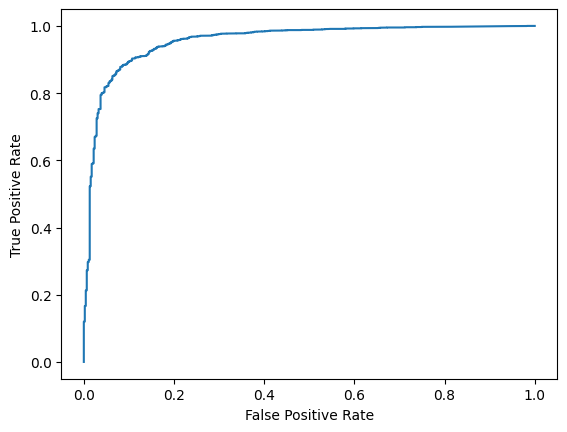

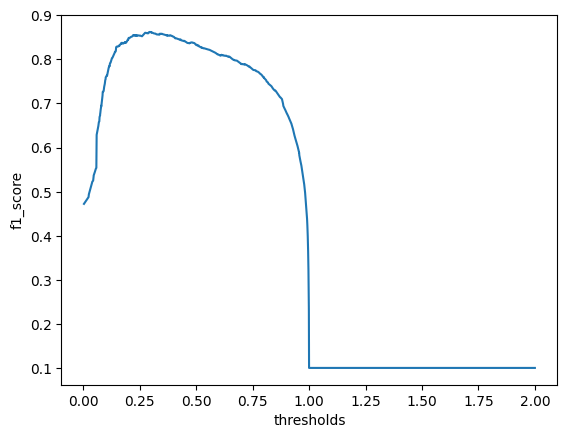

optimum_threshold: 0.29392195


In [98]:
plot_metrics(xgboost, X_val, y_val_bin)

In [ ]:
xgb_df_smo=get_model_metrics('XG Boost',X_train_smo, y_train_smo_mod, xgboost, X_val, y_val_bin)
xgb_df_smo

In [100]:
final_models_metrics_smo=pd.concat([lr_df_smo,nb_df_smo,rfm_df_smo,xgb_df_smo])
final_models_metrics_smo.set_index("Model", inplace=True)

In [101]:
#Lets remove training results to visulaize validation scores
validation_metrics_smote=final_models_metrics_smo.loc[['Logistics Regression Validation','Naive Bayes Validation',
                                                   'Random Forest Validation','XG Boost Validation']]
validation_metrics_smote.style.highlight_max(color = 'lightgreen', axis = 0)

,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
Model,,,,,,,,,
Logistics Regression Validation,93.850000,96.390000,73.800000,96.680000,96.390000,96.390000,26.200000,0.965300,85.090000
Naive Bayes Validation,87.290000,89.490000,69.870000,95.920000,89.490000,89.490000,30.130000,0.925900,79.680000
Random Forest Validation,93.510000,96.190000,72.270000,96.490000,96.190000,96.190000,27.730000,0.963400,84.230000
XG Boost Validation,94.470000,96.770000,76.200000,96.990000,96.770000,96.770000,23.800000,0.968800,86.490000


,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
Model,,,,,,,,,
Logistics Regression Validation,93.850000,96.390000,73.800000,96.680000,96.390000,96.390000,26.200000,0.965300,85.090000
Naive Bayes Validation,87.290000,89.490000,69.870000,95.920000,89.490000,89.490000,30.130000,0.925900,79.680000
Random Forest Validation,93.510000,96.190000,72.270000,96.490000,96.190000,96.190000,27.730000,0.963400,84.230000
XG Boost Validation,94.470000,96.770000,76.200000,96.990000,96.770000,96.770000,23.800000,0.968800,86.490000


- Naive Bayes is still not giving good results compared to all other models.
- XG Boost is having best F1 score.
- Overall Logistics regression and XG Boost are giving best results considering F1 Score and few False Negatives with XG Boost slightly better.
- However performamnce after solving class imbalance issue has degraded compared to vanila ML models.

## Hyperparameter Tunning of models without Data Balancing

As all the models are not performing better than vanila models after Data Balancing therefore Hyper paramter tunning is being performed without Data Balancing

### 1. Logistics Regression with HPT

In [102]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

In [ ]:
#Lets perform cross valiadtion with 5 folds and f1 as scoring metrics
%%time
lr_hpt=LogisticRegression()
cv=5
hyper_params=[{'penalty' : ['l1', 'l2','elasticnet'],
               'C' : np.logspace(-4, 4, 6),
               #'solver' : ['lbfgs','newton-cg','liblinear'],
               'max_iter' : [10,50,80]}
              ]
cv_model_lr=RandomizedSearchCV(estimator=lr_hpt,
                      param_distributions=hyper_params,
                      scoring="f1",
                      cv=cv,
                      verbose=1,
                      return_train_score=True,
                      n_jobs=-1)

CPU times: user 365 µs, sys: 0 ns, total: 365 µs
Wall time: 371 µs


In [ ]:
%%time
cv_model_lr.fit(X_train, y_train_bin)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: user 9.86 s, sys: 651 ms, total: 10.5 s
Wall time: 43.9 s


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions=[{'C': array([1.00000000e-04, 3.98107171e-03, 1.58489319e-01, 6.30957344e+00,
       2.51188643e+02, 1.00000000e+04]),
                                         'max_iter': [10, 50, 80],
                                         'penalty': ['l1', 'l2',
                                                     'elasticnet']}],
                   return_train_score=True, scoring='f1', verbose=1)

In [ ]:
cv_model_lr.best_params_

{'penalty': 'l2', 'max_iter': 80, 'C': 6.309573444801943}

In [ ]:
%%time
lr_hpt=cv_model_lr.best_estimator_
lr_hpt.fit(X_train, y_train_bin)

CPU times: user 8.16 s, sys: 532 ms, total: 8.69 s
Wall time: 5.66 s


LogisticRegression(C=6.309573444801943, max_iter=80)

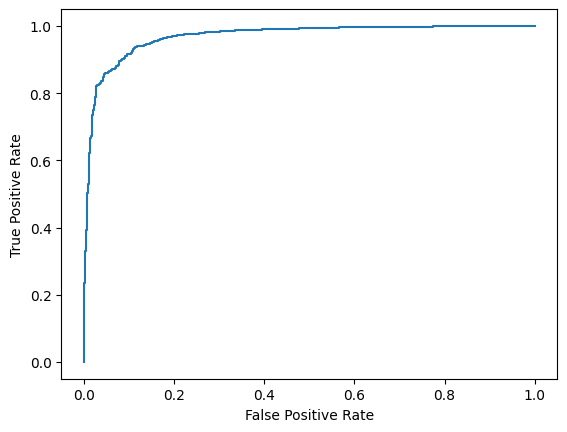

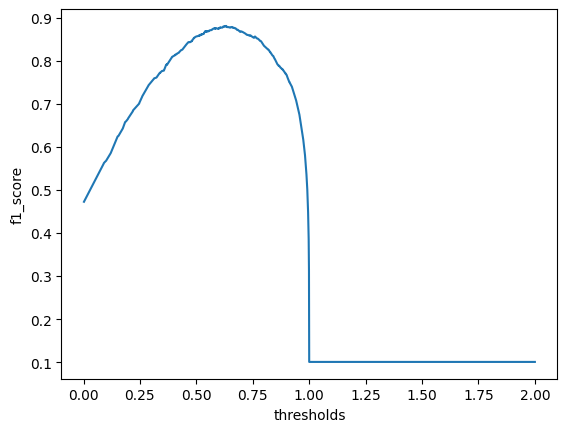

optimum_threshold: 0.6321819380154072


In [ ]:
plot_metrics(lr_hpt, X_val, y_val_bin)

In [ ]:
lr_hpt_df=get_model_metrics('Logistics Regression with HPT',X_train, y_train_bin, lr_hpt, X_val, y_val_bin)
lr_hpt_df

,Model,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
0,Logistics Regression with HPT Validation,95.23,97.24,79.26,97.38,97.24,97.24,20.74,0.9731,88.25
1,Logistics Regression with HPT train,98.36,98.92,93.87,99.22,98.92,98.92,6.13,0.9907,96.40


### 2. Naive Bayes with HPT

In [ ]:
%%time
cv=5
hyper_params=[{'alpha': [0,1,2,3],
               'force_alpha':[True, False],
               'fit_prior':[True, False],
               }]
cv_model_mnb=RandomizedSearchCV(estimator=MultinomialNB(),
                      param_distributions=hyper_params,
                      scoring="f1",
                      cv=cv,
                      verbose=1,
                      return_train_score=True,
                      n_jobs=-1)

CPU times: user 94 µs, sys: 3 µs, total: 97 µs
Wall time: 51.7 µs


In [ ]:
%%time
cv_model_mnb.fit(X_train, y_train_bin)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: user 448 ms, sys: 396 ms, total: 844 ms
Wall time: 16 s


RandomizedSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
                   param_distributions=[{'alpha': [0, 1, 2, 3],
                                         'fit_prior': [True, False],
                                         'force_alpha': [True, False]}],
                   return_train_score=True, scoring='f1', verbose=1)

In [ ]:
cv_model_mnb.best_params_

{'force_alpha': False, 'fit_prior': True, 'alpha': 0}

In [ ]:
%%time
mnb_hpt=cv_model_mnb.best_estimator_
mnb_hpt.fit(X_train, y_train_bin)

CPU times: user 212 ms, sys: 49.7 ms, total: 261 ms
Wall time: 141 ms


MultinomialNB(alpha=0, force_alpha=False)

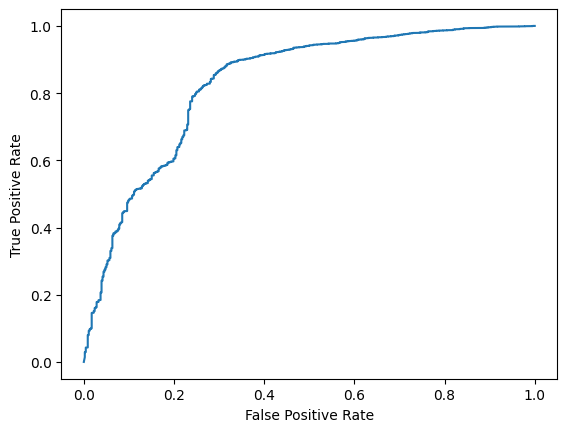

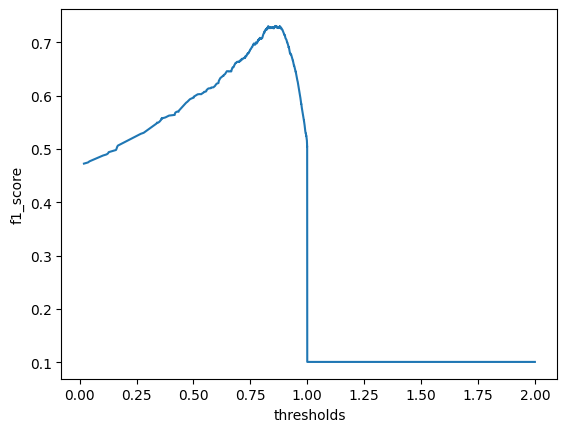

optimum_threshold: 0.8599964720743444


In [ ]:
plot_metrics(mnb_hpt, X_val, y_val_bin)

In [ ]:
mnb_hpt_df=get_model_metrics('Multinomial Naive Bayes with HPT',X_train, y_train_bin, mnb_hpt, X_val, y_val_bin)
mnb_hpt_df

,Model,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
0,Multinomial Naive Bayes with HPT Validation,88.08,91.64,59.83,94.75,91.64,91.64,40.17,0.9317,75.73
1,Multinomial Naive Bayes with HPT train,91.84,92.51,86.58,98.20,92.51,92.51,13.42,0.9527,89.54


### 3. Random Forest with HPT

In [ ]:
%%time
cv=5
hyper_params=[{'n_estimators':[50,100,150],
            'max_depth': [10,12,15],
            #'min_samples_split':[10,12,15],
            'min_samples_leaf':[1,2,5]}
              ]
cv_model_rmf=RandomizedSearchCV(estimator=RandomForestClassifier(oob_score=True),
                      param_distributions=hyper_params,
                      scoring="f1",
                      cv=cv,
                      verbose=1,
                      return_train_score=True,
                      n_jobs=-1)

CPU times: user 250 µs, sys: 9 µs, total: 259 µs
Wall time: 328 µs


In [ ]:
%%time
cv_model_rmf.fit(X_train, y_train_bin)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: user 23.8 s, sys: 2.24 s, total: 26 s
Wall time: 8min 52s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(oob_score=True),
                   n_jobs=-1,
                   param_distributions=[{'max_depth': [10, 12, 15],
                                         'min_samples_leaf': [1, 2, 5],
                                         'n_estimators': [50, 100, 150]}],
                   return_train_score=True, scoring='f1', verbose=1)

In [ ]:
cv_model_rmf.best_params_

{'n_estimators': 150, 'min_samples_leaf': 1, 'max_depth': 15}

In [ ]:
cv_model_rmf.best_params_

{'n_estimators': 150, 'min_samples_leaf': 1, 'max_depth': 15}

In [ ]:
%%time
rmf_hpt=cv_model_rmf.best_estimator_
rmf_hpt.fit(X_train, y_train_bin)

CPU times: user 21 s, sys: 1.5 s, total: 22.5 s
Wall time: 22.5 s


RandomForestClassifier(max_depth=15, n_estimators=150, oob_score=True)

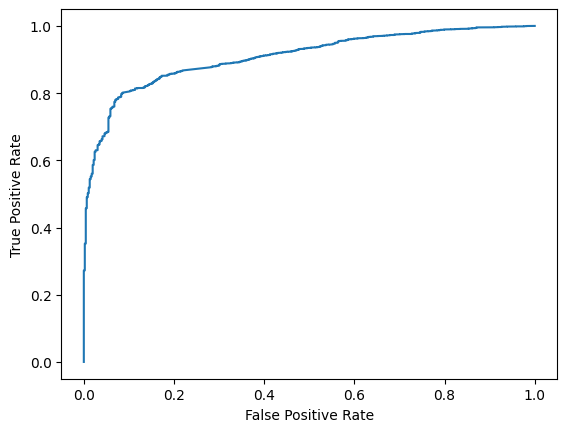

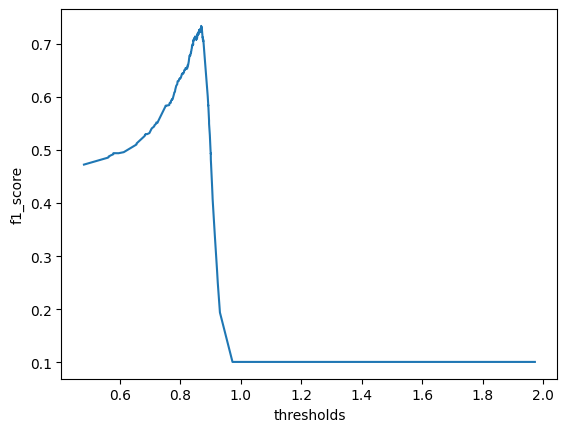

optimum_threshold: 0.8691953161914324


In [ ]:
plot_metrics(rmf_hpt, X_val, y_val_bin)

In [ ]:
rmf_hpt_df=get_model_metrics('Random Forest with HPT', X_train, y_train_bin, rmf_hpt, X_val, y_val_bin)
rmf_hpt_df

,Model,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
0,Random Forest with HPT Validation,85.77,86.73,78.17,96.92,86.73,86.73,21.83,0.9154,82.45
1,Random Forest with HPT train,90.60,90.02,95.18,99.33,90.02,90.02,4.82,0.9445,92.60


### 4. XG Boost with HPT

We are not using Crossvalidation for XG Boost, instead we will be playing with the parameters of XG Boost manually.Foolowing paramters where executed using XG Boost while hyperparameter tunning.

Parameters= n_estimator, learning_rate, max_depth

- 350,0.3,8
- 300,0.3,8
- 200,0.3,8
- 350,0.2,8
- 200,0.2,10
- 250,0.2,9
- 300,0.2,8
- 250,0.2,8
- 200,0.2,8
- 250,0.15,8
- 200,0.15,8
- 300,0.1,9
- 250,0.1,9
- 250,0.1,10
- 250,0.1,8
- 250,0.1,5
- 200,0.1,5
- 150,0.1,5
- 200,0.05,5
- 150,0.05,5

While hyperperameter tunning, for following parameters final model was found with best F1 score and ROC AuC score.

In [ ]:
xgb_hpt_=xgb.XGBClassifier(n_estimators=300,
                          learning_rate =0.3,
                          max_depth = 8)

In [ ]:
%%time
xgb_hpt_.fit(X_train, y_train_bin)

CPU times: user 20min 22s, sys: 1.49 s, total: 20min 23s
Wall time: 12min 42s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
plot_metrics(xgb_hpt_, X_val, y_val_bin)

In [ ]:
xgb_hpt_final_df=get_model_metrics('XG Boost with HPT', X_train, y_train_bin, xgb_hpt_, X_val, y_val_bin)
xgb_hpt_final_df


,Model,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
0,XG Boost with HPT Validation,95.59,97.3,82.10,97.73,97.3,97.3,17.90,0.9751,89.70
1,XG Boost with HPT train,98.97,99.0,98.78,99.85,99.0,99.0,1.22,0.9942,98.89


### `xgb_hpt_` model is giving best performance in terms of f1 and ROC AUC Score among all the model tried till now.

Results of other models tried before above model during Hyperparamter tunning is as under:

In [ ]:
xgb_hpt_1_df=get_model_metrics('XG Boost with HPT', X_train, y_train_bin, xgb_hpt_1, X_val, y_val_bin)
xgb_hpt_1_df

,Model,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
0,XG Boost with HPT Validation,95.49,97.19,82.10,97.73,97.19,97.19,17.90,0.9746,89.64
1,XG Boost with HPT train,99.15,99.15,99.11,99.89,99.15,99.15,0.89,0.9952,99.13


Model Parameter 350,0.3,8

In [ ]:
xgb_hpt_1_df=get_model_metrics('XG Boost with HPT', X_train, y_train_bin, xgb_hpt_1, X_val, y_val_bin)
xgb_hpt_1_df

,Model,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
0,XG Boost with HPT Validation,95.59,97.3,82.10,97.73,97.3,97.3,17.90,0.9751,89.70
1,XG Boost with HPT train,98.97,99.0,98.78,99.85,99.0,99.0,1.22,0.9942,98.89


300,0.3,8

In [ ]:
xgb_hpt_1_df=get_model_metrics('XG Boost with HPT', X_train, y_train_bin, xgb_hpt_1, X_val, y_val_bin)
xgb_hpt_1_df

,Model,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
0,XG Boost with HPT Validation,95.23,96.88,82.10,97.72,96.88,96.88,17.90,0.9730,89.49
1,XG Boost with HPT train,98.44,98.48,98.13,99.76,98.48,98.48,1.87,0.9912,98.30


200,0.3,8

In [ ]:
xgb_hpt_1_df=get_model_metrics('XG Boost with HPT', X_train, y_train_bin, xgb_hpt_1, X_val, y_val_bin)
xgb_hpt_1_df

,Model,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
0,XG Boost with HPT Validation,95.20,96.97,81.22,97.61,96.97,96.97,18.78,0.9729,89.09
1,XG Boost with HPT train,98.72,98.73,98.69,99.83,98.73,98.73,1.31,0.9928,98.71


350,0.2,8

In [ ]:
xgb_hpt_1_df=get_model_metrics('XG Boost with HPT', X_train, y_train_bin, xgb_hpt_1, X_val, y_val_bin)
xgb_hpt_1_df

,Model,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
0,XG Boost with HPT Validation,95.18,96.88,81.66,97.66,96.88,96.88,18.34,0.9727,89.27
1,XG Boost with HPT train,98.29,98.30,98.27,99.78,98.30,98.30,1.73,0.9903,98.28


200,0.2,10

In [ ]:
xgb_hpt_1_df=get_model_metrics('XG Boost with HPT', X_train, y_train_bin, xgb_hpt_1, X_val, y_val_bin)
xgb_hpt_1_df


,Model,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
0,XG Boost with HPT Validation,95.03,96.72,81.66,97.66,96.72,96.72,18.34,0.9719,89.19
1,XG Boost with HPT train,98.42,98.43,98.27,99.78,98.43,98.43,1.73,0.9910,98.35


250,0.2,9

In [ ]:
xgb_hpt_1_df=get_model_metrics('XG Boost with HPT', X_train, y_train_bin, xgb_hpt_1, X_val, y_val_bin)
xgb_hpt_1_df

,Model,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
0,XG Boost with HPT Validation,95.20,96.97,81.22,97.61,96.97,96.97,18.78,0.9729,89.09
1,XG Boost with HPT train,98.49,98.50,98.36,99.79,98.50,98.50,1.64,0.9914,98.43


300,0.2,8

In [ ]:
xgb_hpt_1_df=get_model_metrics('XG Boost with HPT', X_train, y_train_bin, xgb_hpt_1, X_val, y_val_bin)
xgb_hpt_1_df

,Model,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
0,XG Boost with HPT Validation,95.13,96.72,82.53,97.77,96.72,96.72,17.47,0.9724,89.63
1,XG Boost with HPT train,98.17,98.20,97.99,99.74,98.20,98.20,2.01,0.9896,98.09


250,0.2,8

In [ ]:
xgb_hpt_1_df=get_model_metrics('XG Boost with HPT', X_train, y_train_bin, xgb_hpt_1, X_val, y_val_bin)
xgb_hpt_1_df

,Model,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
0,XG Boost with HPT Validation,95.05,96.66,82.31,97.74,96.66,96.66,17.69,0.972,89.49
1,XG Boost with HPT train,97.71,97.77,97.29,99.65,97.77,97.77,2.71,0.987,97.53


200,0.2,8

In [ ]:
xgb_hpt_1_df=get_model_metrics('XG Boost with HPT', X_train, y_train_bin, xgb_hpt_1, X_val, y_val_bin)
xgb_hpt_1_df

,Model,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
0,XG Boost with HPT Validation,94.83,96.58,81.00,97.58,96.58,96.58,19.00,0.9708,88.79
1,XG Boost with HPT train,97.63,97.68,97.24,99.64,97.68,97.68,2.76,0.9865,97.46


250,0.15,8

In [ ]:
xgb_hpt_1_df=get_model_metrics('XG Boost with HPT', X_train, y_train_bin, xgb_hpt_1, X_val, y_val_bin)
xgb_hpt_1_df

,Model,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
0,XG Boost with HPT Validation,94.64,96.28,81.66,97.65,96.28,96.28,18.34,0.9696,88.97
1,XG Boost with HPT train,97.21,97.30,96.49,99.55,97.30,97.30,3.51,0.9841,96.90


200,0.15,8

In [ ]:
xgb_hpt_1_df=get_model_metrics('XG Boost with HPT', X_train, y_train_bin, xgb_hpt_1, X_val, y_val_bin)
xgb_hpt_1_df

,Model,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
0,XG Boost with HPT Validation,94.98,96.58,82.31,97.74,96.58,96.58,17.69,0.9716,89.45
1,XG Boost with HPT train,97.48,97.52,97.10,99.63,97.52,97.52,2.90,0.9856,97.31


300,0.1,9

In [ ]:
xgb_hpt_1_df=get_model_metrics('XG Boost with HPT', X_train, y_train_bin, xgb_hpt_1, X_val, y_val_bin)
xgb_hpt_1_df

,Model,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
0,XG Boost with HPT Validation,94.69,96.30,81.88,97.68,96.30,96.30,18.12,0.9699,89.09
1,XG Boost with HPT train,97.20,97.29,96.45,99.54,97.29,97.29,3.55,0.9840,96.87


250,0.1,9

In [ ]:
xgb_hpt_1_df=get_model_metrics('XG Boost with HPT', X_train, y_train_bin, xgb_hpt_1, X_val, y_val_bin)
xgb_hpt_1_df

,Model,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
0,XG Boost with HPT Validation,94.54,96.28,80.79,97.54,96.28,96.28,19.21,0.9691,88.53
1,XG Boost with HPT train,97.44,97.50,96.96,99.61,97.50,97.50,3.04,0.9854,97.23


250,0.1,10

In [ ]:
xgb_hpt_1_df=get_model_metrics('XG Boost with HPT', X_train, y_train_bin, xgb_hpt_1, X_val, y_val_bin)
xgb_hpt_1_df

,Model,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
0,XG Boost with HPT Validation,94.44,96.06,81.66,97.65,96.06,96.06,18.34,0.9685,88.86
1,XG Boost with HPT train,96.88,97.08,95.28,99.39,97.08,97.08,4.72,0.9822,96.18


250,0.1,8

In [ ]:
xgb_hpt_1_df=get_model_metrics('XG Boost with HPT', X_train, y_train_bin, xgb_hpt_1, X_val, y_val_bin)
xgb_hpt_1_df

,Model,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
0,XG Boost with HPT Validation,93.49,95.12,80.57,97.48,95.12,95.12,19.43,0.9629,87.84
1,XG Boost with HPT train,95.40,95.99,90.74,98.80,95.99,95.99,9.26,0.9737,93.36


250,0.1,5

In [ ]:
xgb_hpt_1_df=get_model_metrics('XG Boost with HPT', X_train, y_train_bin, xgb_hpt_1, X_val, y_val_bin)
xgb_hpt_1_df

,Model,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
0,XG Boost with HPT Validation,93.17,94.82,80.13,97.42,94.82,94.82,19.87,0.961,87.47
1,XG Boost with HPT train,94.93,95.57,89.90,98.68,95.57,95.57,10.10,0.971,92.73


200, 0.1, 5

In [ ]:
xgb_hpt_1_df=get_model_metrics('XG Boost with HPT', X_train, y_train_bin, xgb_hpt_1, X_val, y_val_bin)
xgb_hpt_1_df

,Model,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
0,XG Boost with HPT Validation,92.73,94.48,78.82,97.25,94.48,94.48,21.18,0.9584,86.65
1,XG Boost with HPT train,94.35,95.12,88.26,98.46,95.12,95.12,11.74,0.9676,91.69


150, 0.1,5

In [ ]:
xgb_hpt_1_df=get_model_metrics('XG Boost with HPT', X_train, y_train_bin, xgb_hpt_1, X_val, y_val_bin)
xgb_hpt_1_df

,Model,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
0,XG Boost with HPT Validation,91.99,94.59,71.40,96.32,94.59,94.59,28.60,0.9545,83.00
1,XG Boost with HPT train,93.36,94.93,80.92,97.52,94.93,94.93,19.08,0.9621,87.92


200, 0.05, 5

In [ ]:
xgb_hpt_1_df=get_model_metrics('XG Boost with HPT', X_train, y_train_bin, xgb_hpt_1, X_val, y_val_bin)
xgb_hpt_1_df

,Model,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
0,XG Boost with HPT Validation,91.97,94.70,70.31,96.19,94.70,94.70,29.69,0.9544,82.51
1,XG Boost with HPT train,93.02,94.88,78.30,97.19,94.88,94.88,21.70,0.9602,86.59


150, 0.05, 5

In [ ]:
final_models_metrics_smo_hpt=pd.concat([lr_hpt_df,mnb_hpt_df,rmf_hpt_df,xgb_hpt_final_df])
final_models_metrics_smo_hpt.set_index("Model", inplace=True)

In [ ]:
#Lets remove training results
validation_metrics_smote_hpt=final_models_metrics_smo_hpt.loc[['Logistics Regression with HPT Validation','Multinomial Naive Bayes with HPT Validation',
                                                               'Random Forest with HPT Validation','XG Boost with HPT Validation']]
validation_metrics_smote_hpt.style.highlight_max(color = 'lightgreen', axis = 0)

,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
Model,,,,,,,,,
Logistics Regression with HPT Validation,95.230000,97.240000,79.260000,97.380000,97.240000,97.240000,20.740000,0.973100,88.250000
Multinomial Naive Bayes with HPT Validation,88.080000,91.640000,59.830000,94.750000,91.640000,91.640000,40.170000,0.931700,75.730000
Random Forest with HPT Validation,85.770000,86.730000,78.170000,96.920000,86.730000,86.730000,21.830000,0.915400,82.450000
XG Boost with HPT Validation,95.590000,97.300000,82.100000,97.730000,97.300000,97.300000,17.900000,0.975100,89.700000


### As we can see XG Boost after Hyperparameter tunning and without data balancing is the best performing model with an f1 score of ~90 among all the models tried till now. We will go ahead with this model for evalaution using unseen test data.

## Model Evaluation on Test Data

Lets check performance on unseen data using best model i.e. XG Boost after Hyperparameter tunning on unbalanced data.

In [ ]:
metrics_final_model_df= pd.DataFrame(columns=['Model','Accuracy','Sensitivity','Specificity','Precision','Recall',
                                 'True Positive rate','False Positive rate','F1 Score','ROC score'])
metrics_final_model_df=metrics_final_model_df.append(Metrics(X_test, y_test_bin, xgb_hpt_, 'Final XG Boost model on Test data'),ignore_index=True)
metrics_final_model_df.set_index("Model", inplace=True)
metrics_final_model_df

,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate,F1 Score,ROC score
Model,,,,,,,,,
Final XG Boost model on Test data,94.79,96.66,79.91,97.44,96.66,96.66,20.09,0.9705,88.29


### Final model is performing well on unseen data with ROC AUC score of 88% and f1 score of 0.97.

In [ ]:
#Lets dump our best performing model into pickle file in order to reload model

In [ ]:
import pickle
pickle.dump(xgb_hpt_, open('Xgboost_hpt.pkl', 'wb'))

In [ ]:
#Loading our best model from pickle file
# open a file, where you stored the pickled data
file = open('Xgboost_hpt.pkl', 'rb')

# dump information to that file
model_xg_hpt = pickle.load(file)

# 2. Recommendation Systems on Products

Building a recommendation system as we learnt earlier, we can use the following types of recommendation systems.

- User-based recommendation system

- Item-based recommendation system

Our task is to analyse the recommendation systems and select the one that is best suited in this case.

In [ ]:
user_data.head(2)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive


In [ ]:
# Dividing the dataset into train and test dataset
train_user_df, test_user_df= train_test_split(user_data, test_size=0.3, random_state=63)

In [ ]:
#shape of datatset
train_user_df.shape,test_user_df.shape

((20955, 15), (8981, 15))

In [ ]:
#Check for same product users have given multiple ratings
x=train_user_df[['reviews_username','name','reviews_rating']].groupby(['reviews_username','name']).count()
x[x.reviews_rating > 1][0:5]

,,reviews_rating
reviews_username,name,
1234asdf,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz,2
4 rooms 1 dog lotsa fur,Hoover174 Platinum Collection153 Lightweight Bagged Upright Vacuum With Canister - Uh30010com,2
4djs,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2
7inthenest,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2
85lisa,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2


# 2.1 User based Recommendation system

In [ ]:
# Pivot the train  dataset into matrix format in which columns are products and the rows are users.
# Further as seen above that for same product users have given multiple rating therefore
#average rating shall be taken for that product using aggfunc

pivot_train_user_df= train_user_df.pivot_table(
                              index="reviews_username",
                              columns="name",
                              values="reviews_rating",
                              aggfunc='mean'
                             ).fillna(0)
pivot_train_user_df.head(2)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pivot_train_user_df.shape

(18224, 259)

### Creating dummy train & dummy test dataset
These dataset will be used for prediction

Dummy train will be used later for prediction of the movies which has not been rated by the user. To ignore the movies rated by the user, we will mark it as 0 during prediction. The movies not rated by user is marked as 1 for prediction in dummy train dataset.

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the movies rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [ ]:
dummy_train=train_user_df.copy()

In [ ]:
dummy_train['reviews_rating']=dummy_train['reviews_rating'].apply(lambda x:0 if x>0 else 1)

In [ ]:
#creating dummy pivot table
pivot_dummy_train= dummy_train.pivot_table(
                              index="reviews_username",
                              columns="name",
                              values="reviews_rating",
                              aggfunc='mean'
                             ).fillna(1)
pivot_dummy_train.head(2)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
pivot_dummy_train.shape

(18224, 259)

### Cosine Similarity

Cosine Similarity is a measurement that quantifies the similarity between two vectors [Which is Rating Vector in this case]

### Adjusted Cosine

Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different movies.

We will be implementing adjusted cosing simalarity

In [ ]:
#Similarity Matrix
#Here, we are not removing the NaN values and calculating the mean only for the products rated by the user

In [ ]:
pivot_train_user_df_adj_cosine= train_user_df.pivot_table(
                              index="reviews_username",
                              columns="name",
                              values="reviews_rating",
                              aggfunc="mean"
                              )
pivot_train_user_df_adj_cosine.head(2)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Normalising the rating of the movie for each user around 0 mean

In [ ]:
#mean without considering NaN values
mean=np.nanmean(pivot_train_user_df_adj_cosine, axis=1)
mean

array([4., 1., 3., ..., 5., 2., 5.])

In [ ]:
df_subtracted= (pivot_train_user_df_adj_cosine.T - mean).T
df_subtracted.head(2)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Finding cosine similarity

In [ ]:
# Creating the User Similarity Matrix using pairwise_distance function.
from sklearn.metrics.pairwise import pairwise_distances

# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation[0:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
user_correlation.shape

(18224, 18224)

Even the diagonals of user_correlation after adjusted correlatio are appeaning as zero therfore using simple pairwise distance without normalisation

In [ ]:
user_correlation = 1 - pairwise_distances(pivot_train_user_df.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation[0:5])

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 0.]]


In [ ]:
user_correlation.shape

(18224, 18224)

## Prediction - User User

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0.

In [ ]:
user_correlation[user_correlation<0]=0
user_correlation[0:5]

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.]])

Rating predicted by the user (for products rated as well as not rated) is the weighted sum of correlation with the products rating (as present in the pivot dataset).

In [ ]:
user_predicted_ratings = np.dot(user_correlation, pivot_train_user_df)
user_predicted_ratings[0:5]

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  6.64128507,  0.        , ..., 11.48113609,
         0.        ,  0.        ],
       [ 0.        , 26.77106235,  0.        , ..., 22.54054562,
         0.        ,  0.        ],
       [ 0.        , 26.77106235,  0.        , ..., 22.54054562,
         0.        ,  0.        ],
       [ 0.        ,  9.08817885,  0.        , ...,  6.33134614,
         2.62071209,  0.        ]])

In [ ]:
user_predicted_ratings.shape

(18224, 259)

Since we are interested only in the movies not rated by the user, we will ignore the movies rated by the user by making it zero.

In [ ]:
user_final_ratings=np.multiply(user_predicted_ratings,pivot_dummy_train)

In [ ]:
user_final_ratings.head(2)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
00sab00,0.0,6.641285,0.0,0.0,0.0,0.0,0.0,0.0,8.716191,0.0,...,0.0,0.0,0.0,2.981424,0.0,0.0,0.0,11.481136,0.0,0.0


Finding the top 5 recommendation for the user

In [ ]:
# Take the user ID as input.
user_input = str(input("Enter your reviews_username "))

Enter your reviews_username 00sab00


In [ ]:
prediction = user_final_ratings.loc[user_input].sort_values(ascending=False)[0:5]
prediction

name
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd        107.080600
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)                    60.288576
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)     58.318317
Red (special Edition) (dvdvideo)                                        36.105401
The Resident Evil Collection 5 Discs (blu-Ray)                          35.762796
Name: 00sab00, dtype: float64

## Evaluation - User User

In [ ]:
user_final_ratings.head(2)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
00sab00,0.0,6.641285,0.0,0.0,0.0,0.0,0.0,0.0,8.716191,0.0,...,0.0,0.0,0.0,2.981424,0.0,0.0,0.0,11.481136,0.0,0.0


Evaluation will we same as we have seen above for the prediction. The only difference being, we will evaluate for the movie already rated by the user insead of predicting it for the movie not rated by the user.

In [ ]:
# Find out the common users of test and train dataset.
common = test_user_df[test_user_df.reviews_username	.isin(train_user_df.reviews_username)]
common.shape

(2006, 15)

In [ ]:
common.head(2)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
21090,AVpfM_ytilAPnD_xXIJb,Tostitos,"Food,Packaged Foods,Snacks,Chips & Pretzels,Fo...",Tostitos,Tostitos Bite Size Tortilla Chips,2016-01-20T00:00:00.000Z,False,True,5,Like these better than scoopers,Best for dipping,NaN,NaN,sunflower,Positive
28441,AVpfthSailAPnD_xg3ON,Musselman's,"Food,Packaged Foods,Snacks,Fruit-based Snacks,...",Knouse Foods Inc,"Musselman Apple Sauce, Cinnamon, 48oz",2017-02-17T00:00:00.000Z,True,True,5,Yummy,Yummy,NaN,NaN,keith,Negative


In [ ]:
common.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [ ]:
# convert into the user-movie matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username',
                                              columns='name',
                                              values='reviews_rating',
                                             aggfunc='mean')

In [ ]:
common_user_based_matrix.head(2)

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.","Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",...,Various - Red Hot Blue:Tribute To Cole Porter (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)
user_correlation_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,18214,18215,18216,18217,18218,18219,18220,18221,18222,18223
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
user_correlation_df['reviews_username']=pivot_train_user_df.index
user_correlation_df.set_index('reviews_username', inplace=True)
user_correlation_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,18214,18215,18216,18217,18218,18219,18220,18221,18222,18223
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
list_name = common.reviews_username.to_list()

user_correlation_df.columns=pivot_train_user_df.index.to_list()

user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [ ]:
user_correlation_df_1.shape,user_correlation_df_1.shape

((1701, 18224), (1701, 18224))

In [ ]:
user_correlation_df_1.head(2)

,00dog3,00sab00,01impala,02deuce,0325home,06stidriver,08dallas,09mommy11,1085,11111111aaaaaaaaaaaaaaaaa,...,zpalma,zsarah,zsazsa,zt313,zubb,zulaa118,zuttle,zxcsdfd,zxjki,zzdiane
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [ ]:
user_correlation_df_3 = user_correlation_df_2.T

In [ ]:
user_correlation_df_3.head(2)

,00sab00,1234567,143st,1943,1witch,23jen,4cloroxl,8ellie24,aac06002,aalyah,...,yesseniaw22,ygtz,yohnie1,yucky111,yvonne,zapman,zipper,zippy,zitro,zxcsdfd
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1234567,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
user_correlation_df_3.shape

(1701, 1701)

In [ ]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings[0:2]

array([[0.00000000e+00, 1.24939010e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.15967106e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.42133811e+00, 6.50944555e-01, 0.00000000e+00, 2.03447115e+00,
        7.64906471e+00, 0.00000000e+00, 3.52441025e+00, 0.00000000e+00,
        1.59461060e+00, 1.43673943e+00, 0.00000000e+00, 6.56318955e+00,
        5.93881519e+00, 0.00000000e+00, 1.72107098e+00, 0.00000000e+00,
        7.03447115e+00, 0.00000000e+00, 1.14005892e+01, 6.09071657e+00,
        0.00000000e+00, 3.12347524e+00, 0.00000000e+00, 3.53553391e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.32459940e-01,
        0.00000000e+00, 4.99749452e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.87347886e-01, 3.03135003e+00,
        2.52445036e+00, 0.00000000e+00, 1.07871978e+00, 1.44267142e+00,
        0.00000000e+00, 1.72107098e+00, 0.00000000e+00, 3.123475

In [ ]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username',
                                    columns='name',
                                    values='reviews_rating',
                                    aggfunc='mean').fillna(0)

In [ ]:
dummy_test.head(2)

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.","Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",...,Various - Red Hot Blue:Tribute To Cole Porter (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [ ]:
common_user_predicted_ratings.head(2)

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.","Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",...,Various - Red Hot Blue:Tribute To Cole Porter (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating the RMSE for only the products rated by user. For RMSE, normalising the rating to (1,5) range.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y[0:5])

MinMaxScaler(feature_range=(1, 5))
[[       nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
  4.11671001        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan 

In [ ]:
X.head(2)

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.","Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",...,Various - Red Hot Blue:Tribute To Cole Porter (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
common_ = common.pivot_table(index='reviews_username',
                                    columns='name',
                                    values='reviews_rating',
                                    aggfunc='mean')

In [ ]:
common_.head(2)

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.","Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",...,Various - Red Hot Blue:Tribute To Cole Porter (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))
print(total_non_nan)

1931


In [ ]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print('Root mean square error is ' , rmse)

Root mean square error is  2.108048169572262


# 2.2 Item based Recommendation system

Taking the transpose of the rating matrix to normalize the rating around the mean for different movie ID. In the user based similarity, we had taken mean for each user instead of each movie.

In [ ]:
df_train_pivot = train_user_df.pivot_table(index='reviews_username',
                                    columns='name',
                                    values='reviews_rating',
                                    aggfunc='mean'
).T

df_train_pivot.head()

reviews_username,00dog3,00sab00,01impala,02deuce,0325home,06stidriver,08dallas,09mommy11,1085,11111111aaaaaaaaaaaaaaaaa,...,zpalma,zsarah,zsazsa,zt313,zubb,zulaa118,zuttle,zxcsdfd,zxjki,zzdiane
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Normalising the movie rating for each movie for using the Adujsted Cosine

In [ ]:
mean = np.nanmean(df_train_pivot, axis=1)
df_subtracted = (df_train_pivot.T-mean).T
df_subtracted.head()

reviews_username,00dog3,00sab00,01impala,02deuce,0325home,06stidriver,08dallas,09mommy11,1085,11111111aaaaaaaaaaaaaaaaa,...,zpalma,zsarah,zsazsa,zt313,zubb,zulaa118,zuttle,zxcsdfd,zxjki,zzdiane
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,NaN,0.321782,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finding the cosine similarity using pairwise distances approach

In [ ]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation[0:5])

[[ 1.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          1.          0.         ... -0.00665558  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [ ]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

### Prediction - Item Item

In [ ]:
item_predicted_ratings = np.dot((df_train_pivot.fillna(0).T),item_correlation)
item_predicted_ratings[0:5]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00792648, 0.        , ..., 0.00073982, 0.        ,
        0.        ],
       [0.        , 0.00779003, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01038671, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00149343,
        0.        ]])

In [ ]:
item_predicted_ratings.shape

(18224, 259)

In [ ]:
pivot_dummy_train.shape

(18224, 259)

Filtering the rating only for the movies not rated by the user for recommendation

In [ ]:
item_final_rating = np.multiply(item_predicted_ratings,pivot_dummy_train)
item_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0
00sab00,0.0,0.007926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00074,0.000000,0.0
01impala,0.0,0.007790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.004089,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0
02deuce,0.0,0.010387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.005453,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0
0325home,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004984,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.001493,0.0


Finding the top 5 recommendation for the user

In [ ]:
# Take the user ID as input
user_input = str(input("Enter your user name "))
print(user_input)

Enter your user name 00sab00
00sab00


In [ ]:
# Recommending the Top 5 products to the user.
prediction = item_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
prediction

name
Moom Express Pre Waxed Strips For Face & Bikini                    0.032123
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)               0.023057
Equals (blu-Ray)                                                   0.020438
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd    0.013184
Bilbao Nightstand Gray Oak - South Shore                           0.012736
Name: 00sab00, dtype: float64

## Evaluation - Item Item

Evaluation will we same as we have seen above for the prediction. The only difference being, we will evaluate for the product already rated by the user insead of predicting it for the product not rated by the user.

In [ ]:
test_user_df.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [ ]:
common =  test_user_df[test_user_df.name.isin(train_user_df.name)]
common.shape

(8967, 15)

In [ ]:
common.head(2)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
23891,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...,2014-10-18T00:00:00.000Z,NaN,True,4,If you have every watched the older Godzilla m...,That's the Godzilla i remember.,NaN,NaN,tjbisme,Positive
1454,AVpe_N91LJeJML43z4jD,Way Basics,"Home,Kids' Home,Girls' Room,Girls' Room Furnit...",Way Basics,Way Basics 3-Shelf Eco Narrow Bookcase Storage...,2011-06-16T00:16:13.000Z,NaN,NaN,5,This 3-shelf bookcase is perfect for any small...,Perfect For Small Spaces!,NaN,NaN,christine s,Positive


In [ ]:
common_item_based_matrix = common.pivot_table(index='reviews_username',
                                    columns='name',
                                    values='reviews_rating',
                                    aggfunc='mean').T

In [ ]:
common_item_based_matrix.shape

(199, 8377)

In [ ]:
item_correlation_df = pd.DataFrame(item_correlation)

In [ ]:
item_correlation_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
item_correlation_df['name'] = df_subtracted.index
item_correlation_df.set_index('name',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
list_name = common.name.tolist()

In [ ]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [ ]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [ ]:
item_correlation_df_3.head()

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,...,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Africa's Best No-Lye Dual Conditioning Relaxer System Super,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings[0:5]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00967501, 0.01298338, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
common_item_predicted_ratings.shape

(199, 8377)

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the product rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [ ]:
dummy_test = common.copy()

In [ ]:
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

In [ ]:
dummy_test = dummy_test.pivot_table(index='reviews_username',
                                    columns='name',
                                    values='reviews_rating',
                                    aggfunc='mean').T.fillna(0)


In [ ]:
common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

The products not rated is marked as 0 for evaluation. And make the item- item matrix representaion.

In [ ]:
common_ = common.pivot_table(index='reviews_username',
                                    columns='name',
                                    values='reviews_rating',
                                    aggfunc='mean').T

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y[0:5])

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [ ]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))
print(total_non_nan)

8677


In [ ]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5532850180529354


As seen above user based collaboartive filtering is performing much better compared to item bases filtering as RMSE value for user based collaboartive filter is less.

### Final recommendation building based on User-based collaborative filtering on entire data

In [ ]:
# Pivot the overall dataset into matrix format in which columns are products and the rows are users.
# Further as seen above that for same product users have given multiple rating therefore
#average rating shall be taken for that product using aggfunc

pivot_user_data_df= user_data.pivot_table(
                              index="reviews_username",
                              columns="name",
                              values="reviews_rating",
                              aggfunc='mean'
                             ).fillna(0)
pivot_user_data_df.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Creating dummy user dataset
These dataset will be used for prediction

In [ ]:
dummy_user_data=user_data.copy()

In [ ]:
dummy_user_data['reviews_rating']=dummy_user_data['reviews_rating'].apply(lambda x:0 if x>0 else 1)

In [ ]:
#creating dummy pivot table
pivot_dummy_user_data= dummy_user_data.pivot_table(
                              index="reviews_username",
                              columns="name",
                              values="reviews_rating",
                              aggfunc='mean'
                             ).fillna(1)
pivot_dummy_user_data.head(2)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
pivot_dummy_user_data.shape

(24914, 271)

### Adjusted Cosine

In [ ]:
#Similarity Matrix
#Here, we are not removing the NaN values and calculating the mean only for the products rated by the user

In [ ]:
# #pivot_user_data_df_adj_cosine= user_data.pivot_table(
#                               index="reviews_username",
#                               columns="name",
#                               values="reviews_rating",
#                               aggfunc="mean"
#                               )
# pivot_user_data_df_adj_cosine.head(2)

In [ ]:
### Normalising the rating of the movie for each user around 0 mean

In [ ]:
#mean without considering NaN values
#mean=np.nanmean(pivot_user_data_df_adj_cosine, axis=1)
#mean

In [ ]:
#df_subtracted= (pivot_user_data_df_adj_cosine.T - mean).T
#df_subtracted.head(2)

In [ ]:
### Finding cosine similarity

In [ ]:
# Creating the User Similarity Matrix using simple pairwise_distance function.
#user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
#user_correlation[np.isnan(user_correlation)] = 0
#print(user_correlation)

Even the diagonals of user_correlation after adjusted correlatio are appeaning as zero therfore using simple pairwise distance without normalisation

In [ ]:
user_correlation = 1 - pairwise_distances(pivot_user_data_df.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation[0:5])

[[1.        0.        0.        ... 0.        0.        0.       ]
 [0.        1.        0.        ... 0.        0.9486833 0.       ]
 [0.        0.        1.        ... 0.        0.        0.       ]
 [0.        0.        1.        ... 0.        0.        0.       ]
 [0.        0.        1.        ... 0.        0.        0.       ]]


In [ ]:
## Prediction - User User on entire data

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0.

In [ ]:
user_correlation[user_correlation<0]=0
user_correlation[0:5]

array([[1.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 1.       , 0.       , ..., 0.       , 0.9486833,
        0.       ],
       [0.       , 0.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 1.       , ..., 0.       , 0.       ,
        0.       ]])

In [ ]:
user_predicted_ratings = np.dot(user_correlation, pivot_user_data_df)
user_predicted_ratings[0:5]

array([[ 0.        ,  0.        ,  0.        , ...,  1.52997515,
         0.        ,  0.        ],
       [ 0.        ,  3.20937848,  0.        , ..., 20.48323567,
         4.68148625,  1.19939744],
       [ 0.        , 39.739548  ,  0.        , ..., 29.62511898,
         1.8204164 ,  2.9505076 ],
       [ 0.        , 39.739548  ,  0.        , ..., 29.62511898,
         1.8204164 ,  2.9505076 ],
       [ 0.        , 39.739548  ,  0.        , ..., 29.62511898,
         1.8204164 ,  2.9505076 ]])

Since we are interested only in the movies not rated by the user, we will ignore the movies rated by the user by making it zero.

In [ ]:
user_final_ratings=np.multiply(user_predicted_ratings,pivot_dummy_user_data)
user_final_ratings.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,2.461830,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.529975,0.000000,0.000000
00sab00,0.0,3.209378,0.0,0.0,2.738613,0.0,0.0,0.0,0.0,10.252017,...,0.0,0.0,2.228195,1.785198,0.0,0.0,0.0,20.483236,4.681486,1.199397
01impala,0.0,39.739548,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,22.173428,...,0.0,0.0,2.145284,1.386563,0.0,0.0,0.0,29.625119,1.820416,2.950508
02dakota,0.0,39.739548,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,22.173428,...,0.0,0.0,2.145284,1.386563,0.0,0.0,0.0,29.625119,1.820416,2.950508
02deuce,0.0,39.739548,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,22.173428,...,0.0,0.0,2.145284,1.386563,0.0,0.0,0.0,29.625119,1.820416,2.950508


## Final prediction using sentiment analysis and Recommendation system

In [ ]:
#sample user
user_input = '00sab00'

#products recommended based on collaborative user-user filtering
products = user_final_ratings.loc[user_input].sort_values(ascending=False)[0:20]
products

name
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                    159.844871
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                105.571045
The Resident Evil Collection 5 Discs (blu-Ray)                                      68.467998
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                           59.506398
Red (special Edition) (dvdvideo)                                                    39.194356
Clorox Disinfecting Bathroom Cleaner                                                34.104691
Tostitos Bite Size Tortilla Chips                                                   31.213712
Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo)                       25.160797
Jason Aldean - They Don't Know                                                      22.584020
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                               20.483236
Burt's Bees Lip Shimmer, Raisin                        

In [ ]:
#Lets load our best model from pickle file
# open a file, where i have stored the pickled data
file = open('Xgboost_hpt.pkl', 'rb')

# dump information to that file
model_xg_hpt = pickle.load(file)

Lets calculate average sentiment for a particular product out of all the products, same shall be assigned to  products and recommendations shall be made accordingly with higher sentiment

In [ ]:
#lets predict mean sentiment score for all the unique products
mean_sentiment_score_ = []
for product in products.index:
    prod_score = 0
    total_reviews_per_product = float(len(user_data[(user_data.name==product)].index))
    for indx in user_data[(user_data.name==product)].index.tolist():
        # let's do exception handling as we have droppped few rows as well
        try:
            inp = tfidf.transform([user_data['reviews_text'][indx]]).toarray()
            senti_prediction = float(model_xg_hpt.predict(inp))
            prod_score+=senti_prediction
        except:
            pass
    mean_sentiment_score_.append((product,prod_score/ total_reviews_per_product))

In [ ]:
#mean sentiment score of all the recommended products
mean_sentiment_score_

[('Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd',
  0.9157894736842105),
 ('Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)',
  0.9325744308231173),
 ('The Resident Evil Collection 5 Discs (blu-Ray)', 0.8130177514792899),
 ('Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total',
  0.9081524926686217),
 ('Red (special Edition) (dvdvideo)', 0.9538690476190477),
 ('Clorox Disinfecting Bathroom Cleaner', 0.9215301618440412),
 ('Tostitos Bite Size Tortilla Chips', 0.8257575757575758),
 ('Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo)',
  0.902834008097166),
 ("Jason Aldean - They Don't Know", 0.8823529411764706),
 ('Windex Original Glass Cleaner Refill 67.6oz (2 Liter)', 0.8132183908045977),
 ("Burt's Bees Lip Shimmer, Raisin", 0.8877434135166093),
 ('Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack',
  0.7838709677419354),
 ("Chester's Cheese Flavored Puffcorn Snacks", 0.7740112994350282),
 ('Hormel C

Top 5 recommendations for selected user

In [ ]:
print('Top 5 recommendations for username %s are as under:'%user_input)
[i[0] for i in sorted(mean_sentiment_score_, key = lambda x: x[1], reverse=True)[:5]]

Top 5 recommendations for username 00sab00 are as under:


["Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)",
 'Red (special Edition) (dvdvideo)',
 'Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)',
 'Clorox Disinfecting Bathroom Cleaner',
 'Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd']

So we have generated `Sentiment based Recommendation System` for which used following algorithms/models:
- XG Boost model with Hyperparamter tunning and without Data Balancing
- User Based Collaborative filter for recommendation system